# Home Credit Default Risk

Risk is an unavoidable part of all human activities and occurs in everyday life. When dealing on financial markets investors are facing to financial risk, which is defined as potential financial loss. Banks encounter many types of risks. As most significant risk is credit risk due to the high exposure of banks in credit transactions. 

An existential problem for any Loan providers is to detect the Loan applicants who are very unlikely to repay the loan. Credit institutions aim to develope credit risk model capable of distinquishing between good and bad loans. Ability to recognise default-prone credit contracts help companies avoid losses and incur huge profits.

##### Paper:        
Master thesis
##### Author:       
Marko Vateha
##### Institution:  
University of Economics and Business in Bratislava

![UEBR](https://euba.sk/www_write/images/cache/3dc4b38399662dd1a15ad970fd72c08e_w1200.jpg)

# Part I. Processing the data

In any Machine Learning process, Data Preprocessing is that step in which the data gets transformed, or Encoded, to bring it to such a state that now the machine can easily parse it. In other words, the features of the data can now be easily interpreted by the algorithm.

### 01. First steps

In very first step we import modules we need, then we read the data, we will work with.

#### 1.1 Importing modules:

In preprocessing part, numpy, pandas and matplotlib play important role.

In [43]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# Statistics
from scipy import stats

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.2 Loading data

The data is obtained from https://www.kaggle.com/c/home-credit-default-risk/.

In [95]:
app_train = pd.read_csv('application_train.csv')

In [96]:
print(len(app_train), len(app_train.SK_ID_CURR.unique()))

307511 307511


In [97]:
app_train.set_index('SK_ID_CURR', inplace=True)
app_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
list_of_columns = list(app_train.columns)

### 02. Looking for missing values

Handling missing values is an essential preprocessing task that can drastically deteriorate model when not done with sufficient care.

In [99]:
# checking missing data
missing = app_train.loc[:, app_train.isna().any()]
total = missing.isnull().sum().sort_values(ascending = False)
percent = (missing.isnull().sum()/missing.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

print(missing_application_train_data.count())

Total      67
Percent    67
dtype: int64


#### 2.1 Missings per column/attribute

Our dataset is highly marked by missing values.

In [100]:
# all rows
pd.set_option('display.max_rows', None)

missing_application_train_data

# nad 10% ísť cestou ANO/NIE, enquiry v credit bureau 0/1 druhy stlpec

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953


In [101]:
pd.reset_option('display.max_rows', None)

lst_mis = list(missing_application_train_data.index)
lst_mis.append('TARGET')

corr_matrix = app_train[lst_mis].corr()
corr_matrix['TARGET'].sort_values(ascending=False)

TARGET                      1.000000
DAYS_LAST_PHONE_CHANGE      0.055218
OWN_CAR_AGE                 0.037612
DEF_30_CNT_SOCIAL_CIRCLE    0.032248
DEF_60_CNT_SOCIAL_CIRCLE    0.031276
                              ...   
FLOORSMAX_MEDI             -0.043768
FLOORSMAX_AVG              -0.044003
EXT_SOURCE_1               -0.155317
EXT_SOURCE_2               -0.160472
EXT_SOURCE_3               -0.178919
Name: TARGET, Length: 62, dtype: float64

#### 2.2 Dropping rows for columns with few missings

In [102]:
drop_them = list(missing_application_train_data.tail(10).index)

In [103]:
app_train.dropna(subset=drop_them, axis=0, inplace=True)
print(len(app_train))
app_train.head()

304531


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
# droping the gender anomalie

app_train.drop(app_train.loc[app_train.CODE_GENDER=='XNA'].index, inplace=True, axis=0)

#### 2.3 NaN columns one-hot encoding

We are creating new dummy columns as indicators of previously missing values for respective columns.

In [105]:
col_lst_na = missing_application_train_data.drop(drop_them).index
col_lst_na

# OBS/DEF_30/60_CNT sa po dummies vymazuje
# AMT sa encoduje na One-hot-Encoding

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_AVG', 'FLOORSMIN_MEDI',
       'FLOORSMIN_MODE', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI',
       'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'LANDAREA_AVG', 'LANDAREA_MEDI',
       'LANDAREA_MODE', 'BASEMENTAREA_MODE', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MEDI', 'EXT_SOURCE_1', 'NONLIVINGAREA_AVG',
       'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MODE',
       'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'APARTMENTS_AVG',
       'ENTRANCES_MODE', 'ENTRANCES_AVG', 'ENTRANCES_MEDI', 'LIVINGAREA_MEDI',
       'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE',
       'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MEDI

In [106]:
# nový dataset, kde je informácia, či máme alebo nemáme informáciu pre niektoré parametre

YN_train = pd.DataFrame()

for col in col_lst_na:
    n_col = 'Y_' + col
    YN_train[n_col] = app_train[col].apply(lambda x: int(1) if pd.notna(x) else int(0))    

In [107]:
YN_train.head()

,Y_COMMONAREA_MEDI,Y_COMMONAREA_AVG,Y_COMMONAREA_MODE,Y_NONLIVINGAPARTMENTS_AVG,Y_NONLIVINGAPARTMENTS_MODE,Y_NONLIVINGAPARTMENTS_MEDI,Y_FONDKAPREMONT_MODE,Y_LIVINGAPARTMENTS_AVG,Y_LIVINGAPARTMENTS_MEDI,Y_LIVINGAPARTMENTS_MODE,...,Y_TOTALAREA_MODE,Y_EMERGENCYSTATE_MODE,Y_OCCUPATION_TYPE,Y_EXT_SOURCE_3,Y_AMT_REQ_CREDIT_BUREAU_YEAR,Y_AMT_REQ_CREDIT_BUREAU_QRT,Y_AMT_REQ_CREDIT_BUREAU_HOUR,Y_AMT_REQ_CREDIT_BUREAU_DAY,Y_AMT_REQ_CREDIT_BUREAU_WEEK,Y_AMT_REQ_CREDIT_BUREAU_MON
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
100003,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
100004,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1
100006,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
100007,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,1,1,1,1


In [108]:
app_train[['AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_HOUR',
          'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
          'AMT_REQ_CREDIT_BUREAU_MON']].head(5)

,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON
SK_ID_CURR,,,,,
100002,0.0,0.0,0.0,0.0,0.0
100003,0.0,0.0,0.0,0.0,0.0
100004,0.0,0.0,0.0,0.0,0.0
100006,NaN,NaN,NaN,NaN,NaN
100007,0.0,0.0,0.0,0.0,0.0


### 03. Feature engineering

Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms.

##### Exploring Annuity and Credit we will work with

In [109]:
app_train[['AMT_ANNUITY','AMT_CREDIT']]
# annuity - splátka, credit - úver vo výške

,AMT_ANNUITY,AMT_CREDIT
SK_ID_CURR,,
100002,24700.5,406597.5
100003,35698.5,1293502.5
100004,6750.0,135000.0
100006,29686.5,312682.5
100007,21865.5,513000.0
...,...,...
456251,27558.0,254700.0
456252,12001.5,269550.0
456253,29979.0,677664.0


#### 3.1 New features

A feature is an attribute or property shared by all of the independent units on which analysis or prediction is to be done. 

In [110]:
# anomálie v zamestnani.
app_train['ANOMALIES_EMP'] = app_train['DAYS_EMPLOYED'].apply(lambda x: 1 if x == 365243 else 0)

In [111]:
app_train['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)

In [112]:
app_train['INCOME_TO_CREDIT_RATIO'] = app_train['AMT_INCOME_TOTAL'] / app_train['AMT_CREDIT'] 
app_train['INCOME_TO_ANNUITY_RATIO'] = app_train['AMT_INCOME_TOTAL'] / app_train['AMT_ANNUITY']
app_train['CREDIT_TO_ANNUITY_RATIO'] = app_train['AMT_CREDIT'] / app_train['AMT_ANNUITY']
app_train['INCOME_TO_FAM_SIZE_RATIO'] = app_train['AMT_INCOME_TOTAL'] / app_train['CNT_FAM_MEMBERS']
app_train['DAYS_EMPLOYED_PERCENT'] = app_train['DAYS_EMPLOYED'] / app_train['DAYS_BIRTH']
# app_train['PAYMENT_RATE'] = app_train['AMT_ANNUITY'] / app_train['AMT_CREDIT']

#### 3.2 Correlation to target variable

Exploring the link between new features and target variable, here we are inspecting linear relationship.

In [113]:
corr_n_matrix = app_train[['INCOME_TO_CREDIT_RATIO', 'INCOME_TO_ANNUITY_RATIO','CREDIT_TO_ANNUITY_RATIO',
                           'INCOME_TO_FAM_SIZE_RATIO', 'DAYS_EMPLOYED_PERCENT', 'ANOMALIES_EMP', 
                           'DAYS_EMPLOYED', 'TARGET']].corr()
corr_n_matrix['TARGET'].sort_values(ascending=False)

TARGET                      1.000000
DAYS_EMPLOYED               0.075208
INCOME_TO_CREDIT_RATIO     -0.001606
INCOME_TO_ANNUITY_RATIO    -0.003634
INCOME_TO_FAM_SIZE_RATIO   -0.006070
CREDIT_TO_ANNUITY_RATIO    -0.032148
ANOMALIES_EMP              -0.046230
DAYS_EMPLOYED_PERCENT      -0.068152
Name: TARGET, dtype: float64

#### 3.3 Checking missing values

In [115]:
# checking missing data
missing = app_train.loc[:, app_train.isna().any()]
total = missing.isnull().sum().sort_values(ascending = False)
percent = (missing.isnull().sum()/missing.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

print(missing_application_train_data.count())

Total      59
Percent    59
dtype: int64


In [116]:
missing_application_train_data

,Total,Percent
COMMONAREA_AVG,212867,69.900863
COMMONAREA_MODE,212867,69.900863
COMMONAREA_MEDI,212867,69.900863
NONLIVINGAPARTMENTS_AVG,211542,69.465762
NONLIVINGAPARTMENTS_MODE,211542,69.465762
NONLIVINGAPARTMENTS_MEDI,211542,69.465762
FONDKAPREMONT_MODE,208350,68.417579
LIVINGAPARTMENTS_MODE,208257,68.387040
LIVINGAPARTMENTS_MEDI,208257,68.387040
LIVINGAPARTMENTS_AVG,208257,68.387040


### 04. Split the dataset to CONTINUOUS and CATEGORICAL variables

Both require different approach for preprocessing

In [117]:
likely_cont = {}
for var in app_train.columns:
    likely_cont[var] = 1.*app_train[var].nunique()/app_train[var].count() > 0.0001
    
col_cont = []  
col_cat = []
for k,v in zip(list(likely_cont.keys()), list(likely_cont.values())):
    if v:
        col_cont.append(k)
    else:
        col_cat.append(k)

col_cont.remove('ORGANIZATION_TYPE')
col_cat.append('ORGANIZATION_TYPE')

#### 4.1 Continuous dataframe copy()

In [121]:
col = col_cont.copy()

col.append('TARGET')

In [122]:
app_train_cont = app_train[col].copy()
app_train_cont.columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COM

In [123]:
cont_not_na = [ x for x in app_train_cont if x not in col_lst_na]
cont_not_na

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'INCOME_TO_CREDIT_RATIO',
 'INCOME_TO_ANNUITY_RATIO',
 'CREDIT_TO_ANNUITY_RATIO',
 'INCOME_TO_FAM_SIZE_RATIO',
 'DAYS_EMPLOYED_PERCENT',
 'TARGET']

#### 4.2 Categorical dataframe copy()

In [126]:
app_train_cat = app_train[col_cat].copy()
app_train_cat.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,ANOMALIES_EMP,ORGANIZATION_TYPE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,Business Entity Type 3
100003,0,Cash loans,F,N,N,0,Family,State servant,Higher education,Married,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,School
100004,0,Revolving loans,M,Y,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,Government
100006,0,Cash loans,F,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,Business Entity Type 3
100007,0,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,Religion


In [127]:
print(len(app_train_cont), len(app_train_cat))

300872 300872


### 05. Outliers detection 

An outlier is a data point that differs significantly from other observations.

#### 5.1 Setting Z-score

Z-score (also called a standard score) gives you an idea of how far from the mean a data point is.

In [124]:
from scipy import stats

z = np.abs(stats.zscore(app_train_cont[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                                       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
                                       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'DAYS_LAST_PHONE_CHANGE',
                                        'INCOME_TO_CREDIT_RATIO', 'INCOME_TO_ANNUITY_RATIO', 'CREDIT_TO_ANNUITY_RATIO', 
                                        'INCOME_TO_FAM_SIZE_RATIO', 'DAYS_EMPLOYED_PERCENT']]))

outliers_index = set(np.where(z > 4)[0])

print(len(set(np.where(z > 4)[0])))

3655


##### 5.2 Drop outliers

In [125]:
app_train.drop(app_train_cont.iloc[list(outliers_index)].index, axis=0, inplace=True)
app_train_cont.drop(app_train_cont.iloc[list(outliers_index)].index, axis=0, inplace=True)
len(app_train)

300872

### 06. Storing indexes before Imputing

Most impactful variable should be prevented from deterioration of quality by mean imputing therefore we will predict them. Thus, we store their indices.

In [128]:
# Log.Reg. for imputing of mising values for most important columns

index_ext_3_nan = app_train[app_train['EXT_SOURCE_3'].isnull()].index
index_floor_nan = app_train[app_train['FLOORSMAX_AVG'].isnull()].index
index_ext_1_nan = app_train[app_train['EXT_SOURCE_1'].isnull()].index
index_car_nan = app_train[app_train['OWN_CAR_AGE'].isnull()].index

index_ext_3 = app_train[app_train['EXT_SOURCE_3'].notnull()].index
index_floor = app_train[app_train['FLOORSMAX_AVG'].notnull()].index
index_ext_1 = app_train[app_train['EXT_SOURCE_1'].notnull()].index
index_car = app_train[app_train['OWN_CAR_AGE'].notnull()].index

### 07. Train test split

To prevent from influencing the data preprocessing by information from test set we are splitting it now.

In [131]:
print(len(app_train.index), len(app_train), len(app_train_cont))

300872 300872 300872


#### 7.1 Split

In [132]:
from sklearn.model_selection import train_test_split

y_cont = app_train_cont.iloc[:,-1].copy()
X_cont = app_train_cont.iloc[:,:-1].copy()

X_train, X_test, y_train, y_test = train_test_split(X_cont, y_cont, test_size=0.2, random_state=42)

#### 7.2 Checking the length

In [133]:
print(len(X_cont),len(y_cont))

300872 300872


In [134]:
print(len(X_train),len(X_test))

240697 60175


In [144]:
X_train.columns == X_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

### 08. Simple imputer

SimpleImputer is a scikit-learn class which is helpful in handling the missing data in the predictive model dataset. It replaces the NaN values with a specified placeholder.

#### 8.1 Median strategy

Median is the value separating the higher half from the lower half of a data sample, a population or a probability distribution. For a data set, it may be thought of as the "middle" value.

In [147]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

training = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
testing = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)
# pri missing features by som encodoval 

In [159]:
X_train.columns == training.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [160]:
testing['SPLIT'] = 'test'
training['SPLIT'] = 'train'

In [161]:
app_train_cont = training.append(testing)

len(training.append(testing))

300872

In [162]:
app_train_encoded = app_train_cat.join(app_train_cont)
app_train_encoded.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,INCOME_TO_CREDIT_RATIO,INCOME_TO_ANNUITY_RATIO,CREDIT_TO_ANNUITY_RATIO,INCOME_TO_FAM_SIZE_RATIO,DAYS_EMPLOYED_PERCENT,SPLIT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,0.0149,2.0,2.0,-1134.0,0.498036,8.198215,16.461104,202500.0,0.067329,test
100003,0,Cash loans,F,N,N,0,Family,State servant,Higher education,Married,...,0.0714,1.0,1.0,-828.0,0.208736,7.563343,36.234085,135000.0,0.070862,train
100004,0,Revolving loans,M,Y,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,0.0685,0.0,0.0,-815.0,0.500000,10.000000,20.000000,67500.0,0.011814,train
100006,0,Cash loans,F,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,...,0.0685,2.0,2.0,-617.0,0.431748,4.547522,10.532818,67500.0,0.159905,train
100007,0,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,0.0685,0.0,0.0,-1106.0,0.236842,5.556699,23.461618,121500.0,0.152418,train


In [163]:
print(len(app_train.columns))
app_train = app_train_encoded
print(len(app_train.columns))

# columns split is additional (only one)

127
128


In [164]:
# checking missing data
missing = app_train.loc[:, app_train.isna().any()]
total = missing.isnull().sum().sort_values(ascending = False)
percent = (missing.isnull().sum()/missing.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

print(missing_application_train_data.count())

# Head of table (20)
missing_application_train_data

Total      11
Percent    11
dtype: int64


,Total,Percent
FONDKAPREMONT_MODE,206255,68.552408
WALLSMATERIAL_MODE,153634,51.062910
HOUSETYPE_MODE,151622,50.394188
EMERGENCYSTATE_MODE,143255,47.613271
OCCUPATION_TYPE,94468,31.398070
AMT_REQ_CREDIT_BUREAU_YEAR,40608,13.496769
AMT_REQ_CREDIT_BUREAU_QRT,40608,13.496769
AMT_REQ_CREDIT_BUREAU_MON,40608,13.496769
AMT_REQ_CREDIT_BUREAU_WEEK,40608,13.496769
AMT_REQ_CREDIT_BUREAU_DAY,40608,13.496769


Všetky tieto premenné budú vyriešené pri encodovaní kategorických premenných

In [165]:
print(len(app_train))
app_train.head()

300872


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,INCOME_TO_CREDIT_RATIO,INCOME_TO_ANNUITY_RATIO,CREDIT_TO_ANNUITY_RATIO,INCOME_TO_FAM_SIZE_RATIO,DAYS_EMPLOYED_PERCENT,SPLIT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,0.0149,2.0,2.0,-1134.0,0.498036,8.198215,16.461104,202500.0,0.067329,test
100003,0,Cash loans,F,N,N,0,Family,State servant,Higher education,Married,...,0.0714,1.0,1.0,-828.0,0.208736,7.563343,36.234085,135000.0,0.070862,train
100004,0,Revolving loans,M,Y,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,0.0685,0.0,0.0,-815.0,0.500000,10.000000,20.000000,67500.0,0.011814,train
100006,0,Cash loans,F,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,...,0.0685,2.0,2.0,-617.0,0.431748,4.547522,10.532818,67500.0,0.159905,train
100007,0,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,0.0685,0.0,0.0,-1106.0,0.236842,5.556699,23.461618,121500.0,0.152418,train


### A) Categorical Data Preprocessing

Categorical variable is a variable that can take on one of a limited, and usually fixed, number of possible values, assigning each individual or other unit of observation to a particular group or nominal category

##### Inspecting categorical

We are counting how many unique values are within the column, those column that have a few unique values are labelled as categorical.

In [166]:
likely_cat = {}
for var in app_train.columns:
    likely_cat[var] = 1.*app_train[var].nunique()/app_train[var].count() < 0.0002

likely_cat

{'TARGET': True,
 'NAME_CONTRACT_TYPE': True,
 'CODE_GENDER': True,
 'FLAG_OWN_CAR': True,
 'FLAG_OWN_REALTY': True,
 'CNT_CHILDREN': True,
 'NAME_TYPE_SUITE': True,
 'NAME_INCOME_TYPE': True,
 'NAME_EDUCATION_TYPE': True,
 'NAME_FAMILY_STATUS': True,
 'NAME_HOUSING_TYPE': True,
 'FLAG_MOBIL': True,
 'FLAG_EMP_PHONE': True,
 'FLAG_WORK_PHONE': True,
 'FLAG_CONT_MOBILE': True,
 'FLAG_PHONE': True,
 'FLAG_EMAIL': True,
 'OCCUPATION_TYPE': True,
 'CNT_FAM_MEMBERS': True,
 'REGION_RATING_CLIENT': True,
 'REGION_RATING_CLIENT_W_CITY': True,
 'WEEKDAY_APPR_PROCESS_START': True,
 'HOUR_APPR_PROCESS_START': True,
 'REG_REGION_NOT_LIVE_REGION': True,
 'REG_REGION_NOT_WORK_REGION': True,
 'LIVE_REGION_NOT_WORK_REGION': True,
 'REG_CITY_NOT_LIVE_CITY': True,
 'REG_CITY_NOT_WORK_CITY': True,
 'LIVE_CITY_NOT_WORK_CITY': True,
 'FONDKAPREMONT_MODE': True,
 'HOUSETYPE_MODE': True,
 'WALLSMATERIAL_MODE': True,
 'EMERGENCYSTATE_MODE': True,
 'DEF_30_CNT_SOCIAL_CIRCLE': True,
 'DEF_60_CNT_SOCIAL_CIRCLE'

##### Exploring correlation of features

In [167]:
corr_matrix = app_train.corr()
corr_matrix['TARGET'][60:103].sort_values(ascending=False)

YEARS_BEGINEXPLUATATION_MODE   -0.003857
YEARS_BEGINEXPLUATATION_AVG    -0.004421
YEARS_BEGINEXPLUATATION_MEDI   -0.004633
NONLIVINGAPARTMENTS_MODE       -0.004661
NONLIVINGAPARTMENTS_MEDI       -0.005501
NONLIVINGAPARTMENTS_AVG        -0.005759
YEARS_BUILD_MODE               -0.010102
YEARS_BUILD_AVG                -0.010804
YEARS_BUILD_MEDI               -0.010878
LANDAREA_MODE                  -0.011816
LANDAREA_AVG                   -0.011983
LANDAREA_MEDI                  -0.012249
ENTRANCES_MODE                 -0.013770
COMMONAREA_MODE                -0.015367
ENTRANCES_MEDI                 -0.015962
BASEMENTAREA_MODE              -0.016079
ENTRANCES_AVG                  -0.016185
COMMONAREA_AVG                 -0.016267
COMMONAREA_MEDI                -0.016336
BASEMENTAREA_MEDI              -0.017165
BASEMENTAREA_AVG               -0.017549
NONLIVINGAREA_MODE             -0.017695
NONLIVINGAREA_MEDI             -0.017780
NONLIVINGAREA_AVG              -0.017845
LIVINGAPARTMENTS

#### A) 1. Dummy coding

In dummy coding, the reference group is assigned a value of 0 for each code variable, the group of interest for comparison to the reference group is assigned a value of 1 for its specified code variable, while all other groups are assigned 0 for that particular code variable.

##### name contract

In [168]:
app_train.NAME_CONTRACT_TYPE.value_counts()

Cash loans         273263
Revolving loans     27609
Name: NAME_CONTRACT_TYPE, dtype: int64

In [169]:
dum = pd.get_dummies(app_train.NAME_CONTRACT_TYPE, drop_first=True)
app_train = pd.concat([app_train, dum], axis=1)
app_train.drop(['NAME_CONTRACT_TYPE'], inplace=True, axis=1)
app_train.head(5)

# revol = 1, cash = 0

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,INCOME_TO_CREDIT_RATIO,INCOME_TO_ANNUITY_RATIO,CREDIT_TO_ANNUITY_RATIO,INCOME_TO_FAM_SIZE_RATIO,DAYS_EMPLOYED_PERCENT,SPLIT,Revolving loans
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,...,2.0,2.0,-1134.0,0.498036,8.198215,16.461104,202500.0,0.067329,test,0
100003,0,F,N,N,0,Family,State servant,Higher education,Married,House / apartment,...,1.0,1.0,-828.0,0.208736,7.563343,36.234085,135000.0,0.070862,train,0
100004,0,M,Y,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,...,0.0,0.0,-815.0,0.500000,10.000000,20.000000,67500.0,0.011814,train,1
100006,0,F,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,...,2.0,2.0,-617.0,0.431748,4.547522,10.532818,67500.0,0.159905,train,0
100007,0,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,...,0.0,0.0,-1106.0,0.236842,5.556699,23.461618,121500.0,0.152418,train,0


##### gender

In [171]:
just_dummies = pd.get_dummies(app_train.CODE_GENDER, prefix='Sex',drop_first=True)
app_train = pd.concat([app_train, just_dummies], axis=1)
app_train.drop(['CODE_GENDER'], inplace=True, axis=1)
app_train.head(5)

# female = 0, male = 1

,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,...,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,INCOME_TO_CREDIT_RATIO,INCOME_TO_ANNUITY_RATIO,CREDIT_TO_ANNUITY_RATIO,INCOME_TO_FAM_SIZE_RATIO,DAYS_EMPLOYED_PERCENT,SPLIT,Revolving loans,Sex_M
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,...,2.0,-1134.0,0.498036,8.198215,16.461104,202500.0,0.067329,test,0,1
100003,0,N,N,0,Family,State servant,Higher education,Married,House / apartment,1,...,1.0,-828.0,0.208736,7.563343,36.234085,135000.0,0.070862,train,0,0
100004,0,Y,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,...,0.0,-815.0,0.500000,10.000000,20.000000,67500.0,0.011814,train,1,1
100006,0,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,1,...,2.0,-617.0,0.431748,4.547522,10.532818,67500.0,0.159905,train,0,0
100007,0,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,...,0.0,-1106.0,0.236842,5.556699,23.461618,121500.0,0.152418,train,0,1


##### own car

In [172]:
dum = pd.get_dummies(app_train.FLAG_OWN_CAR, prefix='Car', drop_first=True)
app_train = pd.concat([app_train, dum], axis=1)
app_train.drop(['FLAG_OWN_CAR'], inplace=True, axis=1)
app_train.head(5)

# Y=1, N=0

,TARGET,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,...,DAYS_LAST_PHONE_CHANGE,INCOME_TO_CREDIT_RATIO,INCOME_TO_ANNUITY_RATIO,CREDIT_TO_ANNUITY_RATIO,INCOME_TO_FAM_SIZE_RATIO,DAYS_EMPLOYED_PERCENT,SPLIT,Revolving loans,Sex_M,Car_Y
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,...,-1134.0,0.498036,8.198215,16.461104,202500.0,0.067329,test,0,1,0
100003,0,N,0,Family,State servant,Higher education,Married,House / apartment,1,1,...,-828.0,0.208736,7.563343,36.234085,135000.0,0.070862,train,0,0,0
100004,0,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,...,-815.0,0.500000,10.000000,20.000000,67500.0,0.011814,train,1,1,1
100006,0,Y,0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,...,-617.0,0.431748,4.547522,10.532818,67500.0,0.159905,train,0,0,0
100007,0,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,...,-1106.0,0.236842,5.556699,23.461618,121500.0,0.152418,train,0,1,0


##### own reality

In [173]:
dum = pd.get_dummies(app_train.FLAG_OWN_REALTY, prefix='Real', drop_first=True)
app_train = pd.concat([app_train, dum], axis=1)
app_train.drop(['FLAG_OWN_REALTY'], inplace=True, axis=1)
app_train.head(5)

# Y=1 , N=0

,TARGET,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,INCOME_TO_CREDIT_RATIO,INCOME_TO_ANNUITY_RATIO,CREDIT_TO_ANNUITY_RATIO,INCOME_TO_FAM_SIZE_RATIO,DAYS_EMPLOYED_PERCENT,SPLIT,Revolving loans,Sex_M,Car_Y,Real_Y
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,0,...,0.498036,8.198215,16.461104,202500.0,0.067329,test,0,1,0,1
100003,0,0,Family,State servant,Higher education,Married,House / apartment,1,1,0,...,0.208736,7.563343,36.234085,135000.0,0.070862,train,0,0,0,0
100004,0,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,1,...,0.500000,10.000000,20.000000,67500.0,0.011814,train,1,1,1,1
100006,0,0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,0,...,0.431748,4.547522,10.532818,67500.0,0.159905,train,0,0,0,1
100007,0,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,0,...,0.236842,5.556699,23.461618,121500.0,0.152418,train,0,1,0,1


##### children

In [175]:
app_train.CNT_CHILDREN.value_counts()

0     210596
1      59876
2      26216
3       3641
4        419
5         82
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [176]:
dum = pd.get_dummies(app_train.CNT_CHILDREN, prefix='CH')
dum['CH4>'] = dum.iloc[:,4:].sum(axis=1)
dum.drop(dum.columns[4:-1], axis=1, inplace=True)

app_train = pd.concat([app_train, dum], axis=1)
app_train.drop(['CNT_CHILDREN', 'CH4>'], inplace=True, axis=1)
app_train.head(5)


,TARGET,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,DAYS_EMPLOYED_PERCENT,SPLIT,Revolving loans,Sex_M,Car_Y,Real_Y,CH_0,CH_1,CH_2,CH_3
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,0,1,...,0.067329,test,0,1,0,1,1,0,0,0
100003,0,Family,State servant,Higher education,Married,House / apartment,1,1,0,1,...,0.070862,train,0,0,0,0,1,0,0,0
100004,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,1,1,...,0.011814,train,1,1,1,1,1,0,0,0
100006,0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,0,1,...,0.159905,train,0,0,0,1,1,0,0,0
100007,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,0,1,...,0.152418,train,0,1,0,1,1,0,0,0


##### accompanied

In [178]:
app_train.NAME_TYPE_SUITE.value_counts()

Unaccompanied      244045
Family              39540
Spouse, partner     11209
Children             3227
Other_B              1739
Other_A               849
Group of people       263
Name: NAME_TYPE_SUITE, dtype: int64

In [179]:
dum = pd.get_dummies(app_train.NAME_TYPE_SUITE, prefix='Accompany' , drop_first=True)

app_train = pd.concat([app_train, dum], axis=1)
app_train.drop(['NAME_TYPE_SUITE'], inplace=True, axis=1)
app_train.head(5)

,TARGET,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,...,CH_0,CH_1,CH_2,CH_3,Accompany_Family,Accompany_Group of people,Accompany_Other_A,Accompany_Other_B,"Accompany_Spouse, partner",Accompany_Unaccompanied
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,0,1,1,...,1,0,0,0,0,0,0,0,0,1
100003,0,State servant,Higher education,Married,House / apartment,1,1,0,1,1,...,1,0,0,0,1,0,0,0,0,0
100004,0,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,1
100006,0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
100007,0,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1


##### income type

In [180]:
app_train.NAME_INCOME_TYPE.value_counts()

Working                 156029
Commercial associate     69203
Pensioner                54423
State servant            21172
Unemployed                  19
Student                     16
Businessman                  5
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [181]:
#creating columns form new list with Employed

dum = pd.get_dummies(app_train.NAME_INCOME_TYPE, prefix='Income' , drop_first=True)

app_train = pd.concat([app_train, dum], axis=1)
app_train.drop(['NAME_INCOME_TYPE'], inplace=True, axis=1)
app_train.head(5)

,TARGET,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,...,Accompany_Other_B,"Accompany_Spouse, partner",Accompany_Unaccompanied,Income_Commercial associate,Income_Maternity leave,Income_Pensioner,Income_State servant,Income_Student,Income_Unemployed,Income_Working
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Secondary / secondary special,Single / not married,House / apartment,1,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
100003,0,Higher education,Married,House / apartment,1,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
100004,0,Secondary / secondary special,Single / not married,House / apartment,1,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,1
100006,0,Secondary / secondary special,Civil marriage,House / apartment,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
100007,0,Secondary / secondary special,Single / not married,House / apartment,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


##### education

In [182]:
app_train.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    215056
Higher education                  71835
Incomplete higher                 10059
Lower secondary                    3765
Academic degree                     157
Name: NAME_EDUCATION_TYPE, dtype: int64

In [183]:
dum = pd.get_dummies(app_train.NAME_EDUCATION_TYPE)
dum.columns

Index(['Academic degree', 'Higher education', 'Incomplete higher',
       'Lower secondary', 'Secondary / secondary special'],
      dtype='object')

In [184]:
dum['Higher degree'] = dum.iloc[:,[0,1]].sum(axis=1)
dum.drop(dum.columns[:3], axis=1, inplace=True)
dum.head()
# Incomplete Higher is out

,Lower secondary,Secondary / secondary special,Higher degree
SK_ID_CURR,,,
100002,0,1,0
100003,0,0,1
100004,0,1,0
100006,0,1,0
100007,0,1,0


In [185]:
app_train = pd.concat([app_train, dum], axis=1)
app_train.drop(['NAME_EDUCATION_TYPE'], inplace=True, axis=1)
app_train.head(5)

,TARGET,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,...,Income_Commercial associate,Income_Maternity leave,Income_Pensioner,Income_State servant,Income_Student,Income_Unemployed,Income_Working,Lower secondary,Secondary / secondary special,Higher degree
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Single / not married,House / apartment,1,1,0,1,1,0,Laborers,...,0,0,0,0,0,0,1,0,1,0
100003,0,Married,House / apartment,1,1,0,1,1,0,Core staff,...,0,0,0,1,0,0,0,0,0,1
100004,0,Single / not married,House / apartment,1,1,1,1,1,0,Laborers,...,0,0,0,0,0,0,1,0,1,0
100006,0,Civil marriage,House / apartment,1,1,0,1,0,0,Laborers,...,0,0,0,0,0,0,1,0,1,0
100007,0,Single / not married,House / apartment,1,1,0,1,0,0,Core staff,...,0,0,0,0,0,0,1,0,1,0


##### family status

In [186]:
app_train.NAME_FAMILY_STATUS.value_counts()

Married                 192377
Single / not married     44165
Civil marriage           29214
Separated                19300
Widow                    15816
Name: NAME_FAMILY_STATUS, dtype: int64

In [187]:
app_train.drop(app_train.loc[app_train.NAME_FAMILY_STATUS == 'Unknown'].index, inplace=True, axis=0)

dum = pd.get_dummies(app_train.NAME_FAMILY_STATUS)
dum.columns

Index(['Civil marriage', 'Married', 'Separated', 'Single / not married',
       'Widow'],
      dtype='object')

In [188]:
app_train = pd.concat([app_train, dum], axis=1)
app_train.drop(['NAME_FAMILY_STATUS', 'Widow'], inplace=True, axis=1)
app_train.head(5)

,TARGET,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,...,Income_Student,Income_Unemployed,Income_Working,Lower secondary,Secondary / secondary special,Higher degree,Civil marriage,Married,Separated,Single / not married
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,House / apartment,1,1,0,1,1,0,Laborers,1.0,...,0,0,1,0,1,0,0,0,0,1
100003,0,House / apartment,1,1,0,1,1,0,Core staff,2.0,...,0,0,0,0,0,1,0,1,0,0
100004,0,House / apartment,1,1,1,1,1,0,Laborers,1.0,...,0,0,1,0,1,0,0,0,0,1
100006,0,House / apartment,1,1,0,1,0,0,Laborers,2.0,...,0,0,1,0,1,0,1,0,0,0
100007,0,House / apartment,1,1,0,1,0,0,Core staff,1.0,...,0,0,1,0,1,0,0,0,0,1


##### housing type

In [190]:
app_train.NAME_HOUSING_TYPE.value_counts()

House / apartment      266914
With parents            14558
Municipal apartment     10988
Rented apartment         4775
Office apartment         2544
Co-op apartment          1093
Name: NAME_HOUSING_TYPE, dtype: int64

In [191]:
dum = pd.get_dummies(app_train.NAME_HOUSING_TYPE, drop_first=True)
dum.columns

Index(['House / apartment', 'Municipal apartment', 'Office apartment',
       'Rented apartment', 'With parents'],
      dtype='object')

In [192]:
app_train = pd.concat([app_train, dum], axis=1)
app_train.drop(['NAME_HOUSING_TYPE'], inplace=True, axis=1)
app_train.head(5)

,TARGET,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,...,Higher degree,Civil marriage,Married,Separated,Single / not married,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,1,1,0,1,1,0,Laborers,1.0,2,...,0,0,0,0,1,1,0,0,0,0
100003,0,1,1,0,1,1,0,Core staff,2.0,1,...,1,0,1,0,0,1,0,0,0,0
100004,0,1,1,1,1,1,0,Laborers,1.0,2,...,0,0,0,0,1,1,0,0,0,0
100006,0,1,1,0,1,0,0,Laborers,2.0,2,...,0,1,0,0,0,1,0,0,0,0
100007,0,1,1,0,1,0,0,Core staff,1.0,2,...,0,0,0,0,1,1,0,0,0,0


##### flag phone/mobil

In [193]:
label=[]
for index, col in enumerate(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 
                             'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
                             'FLAG_PHONE', 'FLAG_EMAIL']):
    label.append(col[5:])
    dum = pd.get_dummies(app_train[col], drop_first=True, prefix=label[index])
    
    app_train = pd.concat([app_train, dum], axis=1)
    app_train.drop([col], inplace=True, axis=1)
app_train.head(5)

# phone is provided 1, not provided 0

,TARGET,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,...,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,EMP_PHONE_1,WORK_PHONE_1,CONT_MOBILE_1,PHONE_1,EMAIL_1
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,...,1,0,0,0,0,1,0,1,1,0
100003,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,...,1,0,0,0,0,1,0,1,1,0
100004,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,...,1,0,0,0,0,1,1,1,1,0
100006,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,...,1,0,0,0,0,1,0,1,0,0
100007,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,...,1,0,0,0,0,1,0,1,0,0


##### occupation type

In [195]:
app_train.OCCUPATION_TYPE.value_counts()

Laborers                 54315
Sales staff              31564
Core staff               26862
Managers                 20196
Drivers                  18289
High skill tech staff    11107
Accountants               9506
Medicine staff            8411
Security staff            6618
Cooking staff             5883
Cleaning staff            4596
Private service staff     2599
Low-skill Laborers        2070
Waiters/barmen staff      1329
Secretaries               1283
Realty agents              738
HR staff                   547
IT staff                   491
Name: OCCUPATION_TYPE, dtype: int64

In [196]:
dum = pd.get_dummies(app_train.OCCUPATION_TYPE, prefix='OCCUPATION', drop_first=True)
print(dum.columns)

app_train = pd.concat([app_train, dum], axis=1)
app_train.drop(['OCCUPATION_TYPE'], inplace=True, axis=1)
app_train.head(5)

Index(['OCCUPATION_Cleaning staff', 'OCCUPATION_Cooking staff',
       'OCCUPATION_Core staff', 'OCCUPATION_Drivers', 'OCCUPATION_HR staff',
       'OCCUPATION_High skill tech staff', 'OCCUPATION_IT staff',
       'OCCUPATION_Laborers', 'OCCUPATION_Low-skill Laborers',
       'OCCUPATION_Managers', 'OCCUPATION_Medicine staff',
       'OCCUPATION_Private service staff', 'OCCUPATION_Realty agents',
       'OCCUPATION_Sales staff', 'OCCUPATION_Secretaries',
       'OCCUPATION_Security staff', 'OCCUPATION_Waiters/barmen staff'],
      dtype='object')


,TARGET,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,...,OCCUPATION_Laborers,OCCUPATION_Low-skill Laborers,OCCUPATION_Managers,OCCUPATION_Medicine staff,OCCUPATION_Private service staff,OCCUPATION_Realty agents,OCCUPATION_Sales staff,OCCUPATION_Secretaries,OCCUPATION_Security staff,OCCUPATION_Waiters/barmen staff
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,1.0,2,2,WEDNESDAY,10,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
100003,0,2.0,1,1,MONDAY,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100004,0,1.0,2,2,MONDAY,9,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
100006,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
100007,0,1.0,2,2,THURSDAY,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### family members

In [197]:
app_train.CNT_FAM_MEMBERS.value_counts()

2.0     155122
1.0      66094
3.0      51525
4.0      24208
5.0       3405
6.0        399
7.0         79
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [198]:
dum = pd.get_dummies(app_train.CNT_FAM_MEMBERS, prefix='Fam_Memb')
dum['FM4>'] = dum.iloc[:,4:].sum(axis=1)
dum.drop(dum.columns[4:-1], axis=1, inplace=True)

app_train = pd.concat([app_train, dum], axis=1)
app_train.drop(['CNT_FAM_MEMBERS', 'FM4>'], inplace=True, axis=1)
app_train.head(5)

,TARGET,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,...,OCCUPATION_Private service staff,OCCUPATION_Realty agents,OCCUPATION_Sales staff,OCCUPATION_Secretaries,OCCUPATION_Security staff,OCCUPATION_Waiters/barmen staff,Fam_Memb_1.0,Fam_Memb_2.0,Fam_Memb_3.0,Fam_Memb_4.0
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,2,2,WEDNESDAY,10,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
100003,0,1,1,MONDAY,11,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100004,0,2,2,MONDAY,9,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
100006,0,2,2,WEDNESDAY,17,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100007,0,2,2,THURSDAY,11,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


##### region rating

In [199]:
app_train.REGION_RATING_CLIENT.value_counts()

2    222623
3     47623
1     30626
Name: REGION_RATING_CLIENT, dtype: int64

In [200]:
app_train.REGION_RATING_CLIENT_W_CITY.value_counts()

2    225081
3     43241
1     32550
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

In [201]:
for col in ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']:
    dum = pd.get_dummies(app_train[col], prefix=col)
    dum.drop(dum.iloc[:,[-1]], inplace=True, axis=1)
    
    app_train = pd.concat([app_train, dum], axis=1)
    app_train.drop([col], inplace=True, axis=1)
app_train.head(5)

,TARGET,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FONDKAPREMONT_MODE,...,OCCUPATION_Security staff,OCCUPATION_Waiters/barmen staff,Fam_Memb_1.0,Fam_Memb_2.0,Fam_Memb_3.0,Fam_Memb_4.0,REGION_RATING_CLIENT_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_W_CITY_1,REGION_RATING_CLIENT_W_CITY_2
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,WEDNESDAY,10,0,0,0,0,0,0,reg oper account,...,0,0,1,0,0,0,0,1,0,1
100003,0,MONDAY,11,0,0,0,0,0,0,reg oper account,...,0,0,0,1,0,0,1,0,1,0
100004,0,MONDAY,9,0,0,0,0,0,0,NaN,...,0,0,1,0,0,0,0,1,0,1
100006,0,WEDNESDAY,17,0,0,0,0,0,0,NaN,...,0,0,0,1,0,0,0,1,0,1
100007,0,THURSDAY,11,0,0,0,0,1,1,NaN,...,0,0,1,0,0,0,0,1,0,1


##### week days

In [202]:
app_train.WEEKDAY_APPR_PROCESS_START.value_counts()

TUESDAY      52754
WEDNESDAY    50789
MONDAY       49676
THURSDAY     49474
FRIDAY       49210
SATURDAY     33130
SUNDAY       15839
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [203]:
dum = pd.get_dummies(app_train.WEEKDAY_APPR_PROCESS_START)
dum.drop(['SUNDAY'], axis=1, inplace=True)
dum

app_train = pd.concat([app_train, dum], axis=1)
app_train.drop(['WEEKDAY_APPR_PROCESS_START'], inplace=True, axis=1)
app_train.head(5)

,TARGET,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FONDKAPREMONT_MODE,HOUSETYPE_MODE,...,REGION_RATING_CLIENT_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_W_CITY_1,REGION_RATING_CLIENT_W_CITY_2,FRIDAY,MONDAY,SATURDAY,THURSDAY,TUESDAY,WEDNESDAY
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,10,0,0,0,0,0,0,reg oper account,block of flats,...,0,1,0,1,0,0,0,0,0,1
100003,0,11,0,0,0,0,0,0,reg oper account,block of flats,...,1,0,1,0,0,1,0,0,0,0
100004,0,9,0,0,0,0,0,0,NaN,NaN,...,0,1,0,1,0,1,0,0,0,0
100006,0,17,0,0,0,0,0,0,NaN,NaN,...,0,1,0,1,0,0,0,0,0,1
100007,0,11,0,0,0,0,1,1,NaN,NaN,...,0,1,0,1,0,0,0,1,0,0


#####  hours

In [204]:
app_train.HOUR_APPR_PROCESS_START.value_counts()

10    37000
11    36528
12    33454
13    30284
14    27026
9     26903
15    24234
16    19876
8     14889
17    14464
7      8985
18     8777
6      5765
19     3704
5      3571
4      2042
3      1198
20     1167
21      399
2       295
22      148
1        86
23       39
0        38
Name: HOUR_APPR_PROCESS_START, dtype: int64

In [205]:
dum = pd.get_dummies(app_train.HOUR_APPR_PROCESS_START, prefix='Hour', drop_first=True)


app_train = pd.concat([app_train, dum], axis=1)
app_train.drop(['HOUR_APPR_PROCESS_START'], inplace=True, axis=1)
app_train.head(5)

,TARGET,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,0,0,0,0,0,reg oper account,block of flats,"Stone, brick",...,0,0,0,0,0,0,0,0,0,0
100003,0,0,0,0,0,0,0,reg oper account,block of flats,Block,...,0,0,0,0,0,0,0,0,0,0
100004,0,0,0,0,0,0,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
100006,0,0,0,0,0,0,0,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
100007,0,0,0,0,0,1,1,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


##### address

In [206]:
for col in ['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 
         'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
         'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']:
    print(app_train[col].value_counts())

0    296410
1      4462
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64
0    285884
1     14988
Name: REG_REGION_NOT_WORK_REGION, dtype: int64
0    288881
1     11991
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64
0    277345
1     23527
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64
0    231396
1     69476
Name: REG_CITY_NOT_WORK_CITY, dtype: int64
0    246728
1     54144
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64


##### organization

In [207]:
app_train.ORGANIZATION_TYPE.value_counts()
# 15 dummies - je to ML a ten model sa má rozhodnuť. 

Business Entity Type 3    66193
XNA                       54434
Self-employed             37698
Other                     16354
Medicine                  10968
Business Entity Type 2    10330
Government                10205
School                     8746
Trade: type 7              7674
Kindergarten               6795
Construction               6547
Business Entity Type 1     5815
Transport: type 4          5286
Trade: type 3              3408
Industry: type 9           3263
Industry: type 3           3235
Security                   3180
Housing                    2912
Industry: type 11          2656
Military                   2545
Agriculture                2427
Bank                       2384
Police                     2273
Transport: type 2          2158
Postal                     2124
Security Ministries        1906
Trade: type 2              1804
Restaurant                 1781
Services                   1550
University                 1290
Industry: type 7           1278
Transpor

In [208]:
dum = pd.get_dummies(app_train.ORGANIZATION_TYPE, prefix='ORG', drop_first=True)
print(dum.columns)

Index(['ORG_Agriculture', 'ORG_Bank', 'ORG_Business Entity Type 1',
       'ORG_Business Entity Type 2', 'ORG_Business Entity Type 3',
       'ORG_Cleaning', 'ORG_Construction', 'ORG_Culture', 'ORG_Electricity',
       'ORG_Emergency', 'ORG_Government', 'ORG_Hotel', 'ORG_Housing',
       'ORG_Industry: type 1', 'ORG_Industry: type 10',
       'ORG_Industry: type 11', 'ORG_Industry: type 12',
       'ORG_Industry: type 13', 'ORG_Industry: type 2', 'ORG_Industry: type 3',
       'ORG_Industry: type 4', 'ORG_Industry: type 5', 'ORG_Industry: type 6',
       'ORG_Industry: type 7', 'ORG_Industry: type 8', 'ORG_Industry: type 9',
       'ORG_Insurance', 'ORG_Kindergarten', 'ORG_Legal Services',
       'ORG_Medicine', 'ORG_Military', 'ORG_Mobile', 'ORG_Other', 'ORG_Police',
       'ORG_Postal', 'ORG_Realtor', 'ORG_Religion', 'ORG_Restaurant',
       'ORG_School', 'ORG_Security', 'ORG_Security Ministries',
       'ORG_Self-employed', 'ORG_Services', 'ORG_Telecom', 'ORG_Trade: type 1',
       

In [209]:
app_train = pd.concat([app_train, dum], axis=1)
app_train.drop(['ORGANIZATION_TYPE'], inplace=True, axis=1)
app_train.head(5)

,TARGET,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,...,ORG_Trade: type 4,ORG_Trade: type 5,ORG_Trade: type 6,ORG_Trade: type 7,ORG_Transport: type 1,ORG_Transport: type 2,ORG_Transport: type 3,ORG_Transport: type 4,ORG_University,ORG_XNA
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,0,0,0,0,0,reg oper account,block of flats,"Stone, brick",...,0,0,0,0,0,0,0,0,0,0
100003,0,0,0,0,0,0,0,reg oper account,block of flats,Block,...,0,0,0,0,0,0,0,0,0,0
100004,0,0,0,0,0,0,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
100006,0,0,0,0,0,0,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
100007,0,0,0,0,0,1,1,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


##### bureau interactions

In [210]:
app_train.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    258680
1.0      1519
2.0        55
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [211]:
app_train.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    258809
1.0      1271
2.0       101
3.0        42
4.0        22
5.0         9
6.0         7
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [212]:
app_train.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

0.0    251857
1.0      8093
2.0       194
3.0        54
4.0        31
6.0        20
5.0         9
8.0         4
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [213]:
app_train.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     217410
1.0      32520
2.0       5259
3.0       1939
4.0       1047
5.0        584
6.0        332
7.0        288
9.0        202
8.0        177
10.0       127
11.0       114
12.0        75
13.0        70
14.0        37
15.0        35
16.0        23
17.0        12
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [214]:
app_train.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      210620
1.0       33274
2.0       14114
3.0        1689
4.0         462
5.0          63
6.0          27
7.0           7
8.0           6
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [215]:
for new, old in zip(['BUREAU_HOUR', 'BUREAU_DAY',
                     'BUREAU_WEEK', 'BUREAU_MON', 
                     'BUREAU_QRT'],
                    ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 
                     'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 
                     'AMT_REQ_CREDIT_BUREAU_QRT']):
    app_train[new] = app_train[old].apply(lambda x: 0 if x == 0.0 else 1)

app_train.head(5)

# there are 0 interaction one hour before applying

,TARGET,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,...,ORG_Transport: type 2,ORG_Transport: type 3,ORG_Transport: type 4,ORG_University,ORG_XNA,BUREAU_HOUR,BUREAU_DAY,BUREAU_WEEK,BUREAU_MON,BUREAU_QRT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,0,0,0,0,0,reg oper account,block of flats,"Stone, brick",...,0,0,0,0,0,0,0,0,0,0
100003,0,0,0,0,0,0,0,reg oper account,block of flats,Block,...,0,0,0,0,0,0,0,0,0,0
100004,0,0,0,0,0,0,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
100006,0,0,0,0,0,0,0,NaN,NaN,NaN,...,0,0,0,0,0,1,1,1,1,1
100007,0,0,0,0,0,1,1,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [216]:
app_train.drop(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 
                'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 
                'AMT_REQ_CREDIT_BUREAU_QRT'], axis=1, inplace=True)

In [217]:
app_train.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     69418
1.0     62249
2.0     49319
3.0     33094
4.0     20378
5.0     11847
6.0      6847
7.0      3807
8.0      2095
9.0      1073
11.0       29
12.0       28
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [218]:
dum = pd.get_dummies(app_train.AMT_REQ_CREDIT_BUREAU_YEAR, prefix='BUREAU_YEAR')
dum['C_BUREAU_Y_1'] = dum.iloc[:,[0]].sum(axis=1)
dum['C_BUREAU_Y_2'] = dum.iloc[:,[1]].sum(axis=1)
dum['C_BUREAU_Y_3'] = dum.iloc[:,[2]].sum(axis=1)
dum['C_BUREAU_Y_4'] = dum.iloc[:,[3]].sum(axis=1)
dum.drop(dum.iloc[:,5:], axis=1, inplace=True)

app_train = pd.concat([app_train, dum], axis=1)
app_train.drop(['AMT_REQ_CREDIT_BUREAU_YEAR'], inplace=True, axis=1)
app_train.head(5)

# Zero interactions are dropped

,TARGET,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,...,BUREAU_HOUR,BUREAU_DAY,BUREAU_WEEK,BUREAU_MON,BUREAU_QRT,BUREAU_YEAR_0.0,BUREAU_YEAR_1.0,BUREAU_YEAR_2.0,BUREAU_YEAR_3.0,BUREAU_YEAR_4.0
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,0,0,0,0,0,reg oper account,block of flats,"Stone, brick",...,0,0,0,0,0,0,1,0,0,0
100003,0,0,0,0,0,0,0,reg oper account,block of flats,Block,...,0,0,0,0,0,1,0,0,0,0
100004,0,0,0,0,0,0,0,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
100006,0,0,0,0,0,0,0,NaN,NaN,NaN,...,1,1,1,1,1,0,0,0,0,0
100007,0,0,0,0,0,1,1,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0


##### default on social cyrcle

In [219]:
for col in ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
            'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']:
    print(app_train[col].value_counts())

0.0      160643
1.0       47957
2.0       29345
3.0       19986
4.0       13900
5.0        9413
6.0        6347
7.0        4318
8.0        2905
9.0        1966
10.0       1357
11.0        838
12.0        639
13.0        404
14.0        253
15.0        163
16.0        132
17.0         85
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         14
24.0         11
25.0         11
27.0          5
26.0          3
30.0          2
28.0          1
348.0         1
29.0          1
47.0          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64
0.0     266227
1.0      27913
2.0       5239
3.0       1176
4.0        248
5.0         55
6.0         11
7.0          1
8.0          1
34.0         1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64
0.0      161380
1.0       48050
2.0       29306
3.0       19867
4.0       13717
5.0        9322
6.0        6246
7.0        4276
8.0        2822
9.0        1923
10.0       1315
11.0        824
12.0        610
13.0        394
14.0    

In [220]:
dum = pd.get_dummies(app_train.OBS_30_CNT_SOCIAL_CIRCLE, prefix='CNT_SOC', drop_first=True)
dum['OBS_30_1'] = dum.iloc[:,[0]]
dum['OBS_30_2'] = dum.iloc[:,[1]]
dum['OBS_30_3_4'] = dum.iloc[:,[2,3]].sum(axis=1)
# dum['OBS_30_5>'] = dum.iloc[:,4:-3].sum(axis=1)
dum.drop(dum.iloc[:,:-3], axis=1, inplace=True)

app_train = pd.concat([app_train, dum], axis=1)
app_train.drop(['OBS_30_CNT_SOCIAL_CIRCLE'], inplace=True, axis=1)
app_train.head(5)

,TARGET,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,...,BUREAU_MON,BUREAU_QRT,BUREAU_YEAR_0.0,BUREAU_YEAR_1.0,BUREAU_YEAR_2.0,BUREAU_YEAR_3.0,BUREAU_YEAR_4.0,OBS_30_1,OBS_30_2,OBS_30_3_4
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,0,0,0,0,0,reg oper account,block of flats,"Stone, brick",...,0,0,0,1,0,0,0,0,1,0
100003,0,0,0,0,0,0,0,reg oper account,block of flats,Block,...,0,0,1,0,0,0,0,1,0,0
100004,0,0,0,0,0,0,0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0
100006,0,0,0,0,0,0,0,NaN,NaN,NaN,...,1,1,0,0,0,0,0,0,1,0
100007,0,0,0,0,0,1,1,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0


In [221]:
dum = pd.get_dummies(app_train.DEF_30_CNT_SOCIAL_CIRCLE, prefix='CNT_SOC', drop_first=True)
dum['DEF_30_1'] = dum.iloc[:,[0]]
dum['DEF_30_2'] = dum.iloc[:,[1]]
# dum['DEF_30_3>'] = dum.iloc[:,2:-2].sum(axis=1)
dum.drop(dum.iloc[:,:-2], axis=1, inplace=True)

app_train = pd.concat([app_train, dum], axis=1)
app_train.drop(['DEF_30_CNT_SOCIAL_CIRCLE'], inplace=True, axis=1)
app_train.head(5)

,TARGET,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,...,BUREAU_YEAR_0.0,BUREAU_YEAR_1.0,BUREAU_YEAR_2.0,BUREAU_YEAR_3.0,BUREAU_YEAR_4.0,OBS_30_1,OBS_30_2,OBS_30_3_4,DEF_30_1,DEF_30_2
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,0,0,0,0,0,reg oper account,block of flats,"Stone, brick",...,0,1,0,0,0,0,1,0,0,1
100003,0,0,0,0,0,0,0,reg oper account,block of flats,Block,...,1,0,0,0,0,1,0,0,0,0
100004,0,0,0,0,0,0,0,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
100006,0,0,0,0,0,0,0,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
100007,0,0,0,0,0,1,1,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0


In [222]:
dum = pd.get_dummies(app_train.OBS_60_CNT_SOCIAL_CIRCLE, prefix='CNT_SOC', drop_first=True)
dum['OBS_60_1'] = dum.iloc[:,[0]]
dum['OBS_60_2'] = dum.iloc[:,[1]]
dum['OBS_60_3_4'] = dum.iloc[:,[2,3]].sum(axis=1)
# dum['OBS_60_5>'] = dum.iloc[:,4:-3].sum(axis=1)
dum.drop(dum.iloc[:,:-3], axis=1, inplace=True)

app_train = pd.concat([app_train, dum], axis=1)
app_train.drop(['OBS_60_CNT_SOCIAL_CIRCLE'], inplace=True, axis=1)
app_train.head(5)

,TARGET,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,...,BUREAU_YEAR_3.0,BUREAU_YEAR_4.0,OBS_30_1,OBS_30_2,OBS_30_3_4,DEF_30_1,DEF_30_2,OBS_60_1,OBS_60_2,OBS_60_3_4
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,0,0,0,0,0,reg oper account,block of flats,"Stone, brick",...,0,0,0,1,0,0,1,0,1,0
100003,0,0,0,0,0,0,0,reg oper account,block of flats,Block,...,0,0,1,0,0,0,0,1,0,0
100004,0,0,0,0,0,0,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
100006,0,0,0,0,0,0,0,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,1,0
100007,0,0,0,0,0,1,1,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [223]:
dum = pd.get_dummies(app_train.DEF_60_CNT_SOCIAL_CIRCLE, prefix='BUREAU_QRT', drop_first=True)
dum['DEF_60_1'] = dum.iloc[:,[0]]
dum['DEF_60_2'] = dum.iloc[:,[1]]
# dum['DEF_60_3>'] = dum.iloc[:,2:-2].sum(axis=1)
dum.drop(dum.iloc[:,:-2], axis=1, inplace=True)

app_train = pd.concat([app_train, dum], axis=1)
app_train.drop(['DEF_60_CNT_SOCIAL_CIRCLE'], inplace=True, axis=1)
app_train.head(5)

,TARGET,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,...,OBS_30_1,OBS_30_2,OBS_30_3_4,DEF_30_1,DEF_30_2,OBS_60_1,OBS_60_2,OBS_60_3_4,DEF_60_1,DEF_60_2
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,0,0,0,0,0,reg oper account,block of flats,"Stone, brick",...,0,1,0,0,1,0,1,0,0,1
100003,0,0,0,0,0,0,0,reg oper account,block of flats,Block,...,1,0,0,0,0,1,0,0,0,0
100004,0,0,0,0,0,0,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
100006,0,0,0,0,0,0,0,NaN,NaN,NaN,...,0,1,0,0,0,0,1,0,0,0
100007,0,0,0,0,0,1,1,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


#### A) 2. Summary after dummy variable creation

In [224]:
app_train.head(5)

# 264 cols beforehand

,TARGET,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,...,OBS_30_1,OBS_30_2,OBS_30_3_4,DEF_30_1,DEF_30_2,OBS_60_1,OBS_60_2,OBS_60_3_4,DEF_60_1,DEF_60_2
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,0,0,0,0,0,reg oper account,block of flats,"Stone, brick",...,0,1,0,0,1,0,1,0,0,1
100003,0,0,0,0,0,0,0,reg oper account,block of flats,Block,...,1,0,0,0,0,1,0,0,0,0
100004,0,0,0,0,0,0,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
100006,0,0,0,0,0,0,0,NaN,NaN,NaN,...,0,1,0,0,0,0,1,0,0,0
100007,0,0,0,0,0,1,1,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


### B) Continuous variable

If a variable can take on any value between its minimum value and its maximum value, it is called a continuous variable.

##### Exploring continuous attributes

In [225]:
likely_cont = {}
for var in app_train.columns:
    likely_cont[var] = 1.*app_train[var].nunique()/app_train[var].count() > 0.0001

In [226]:
for k,v in zip(list(likely_cont.keys()), list(likely_cont.values())):
    if v:
        print(k)

AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAREA_MODE
APARTMENTS_MEDI
BASEMENTAREA_MEDI
YEARS_BEGINEXPLUATATION_MEDI
YEARS_BUILD_MEDI
COMMONAREA_MEDI
ELEVATORS_MEDI
ENTRANCES_MEDI
FLOORSMAX_MEDI
FLOORSMIN_MEDI
LANDAREA_MEDI
LIVINGAPARTMENTS_MEDI
LIVINGAREA_MEDI
NONLIVINGAPARTMENTS_MEDI
NONLIVINGAREA_MEDI
TOTALAREA_MODE
DAYS_LAST_PHONE_CHANGE
INCOME_TO_CREDIT_RATIO
INCOME_TO_ANNUITY_RATIO
CREDIT_TO_ANNUITY_RATIO
INCOME_TO_FAM_SI

#### B) 1. Logaritmic tranformation

##### First group of variables

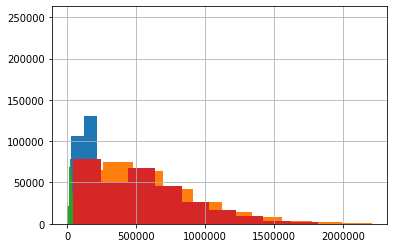

In [228]:
for col in ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
            'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
            'OWN_CAR_AGE']:
    app_train[col].hist()

In [229]:
for col in ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
            'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
            'OWN_CAR_AGE']:
    app_train[col] = np.log(app_train[col]+1)
app_train.head(5)

,TARGET,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,...,OBS_30_1,OBS_30_2,OBS_30_3_4,DEF_30_1,DEF_30_2,OBS_60_1,OBS_60_2,OBS_60_3_4,DEF_60_1,DEF_60_2
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,0,0,0,0,0,reg oper account,block of flats,"Stone, brick",...,0,1,0,0,1,0,1,0,0,1
100003,0,0,0,0,0,0,0,reg oper account,block of flats,Block,...,1,0,0,0,0,1,0,0,0,0
100004,0,0,0,0,0,0,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
100006,0,0,0,0,0,0,0,NaN,NaN,NaN,...,0,1,0,0,0,0,1,0,0,0
100007,0,0,0,0,0,1,1,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


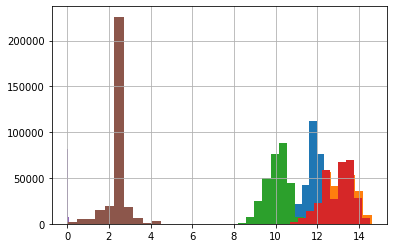

In [230]:
for col in ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
            'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
            'OWN_CAR_AGE']:
    app_train[col].hist()

##### Second group of variables

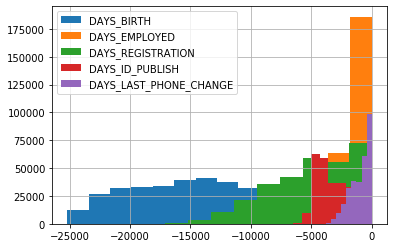

In [231]:
for col in ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']:
    app_train[col].hist()
    plt.legend(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'])

In [232]:
col_list = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']
n_col_list = ['BIRTH_Y', 'EMPLOYED_Y', 'RGISTRATION_Y', 'ID_Y', 'PHONE_Y']
app_train.rename(columns=dict(zip(col_list, n_col_list)) , inplace=True)

for col in n_col_list:
    app_train[col] = np.log((app_train[col]-1)/365*(-1))
app_train[n_col_list].head()

,BIRTH_Y,EMPLOYED_Y,RGISTRATION_Y,ID_Y,PHONE_Y
SK_ID_CURR,,,,,
100002,3.255142,0.558441,2.302311,1.759746,1.134491
100003,3.827211,1.180971,1.179287,-0.223144,0.820323
100004,3.954768,-0.479362,2.457362,1.936867,0.804517
100006,3.952613,2.119715,3.293704,1.899036,0.526591
100007,4.000235,2.119386,2.469260,2.248837,1.109512


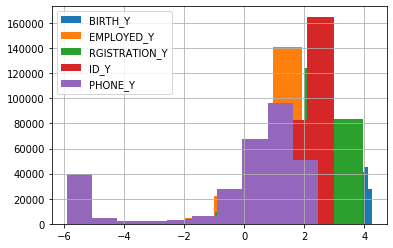

In [233]:
for col in ['BIRTH_Y', 'EMPLOYED_Y', 'RGISTRATION_Y', 'ID_Y', 'PHONE_Y']:
    app_train[col].hist()
    plt.legend(['BIRTH_Y', 'EMPLOYED_Y', 'RGISTRATION_Y', 'ID_Y', 'PHONE_Y'])

##### Third group of variables

This group is approximately normally distributed thus no need for transformation.

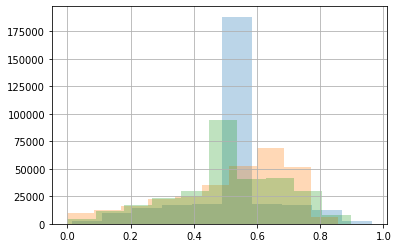

In [234]:
for col in ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']:
    app_train[col].hist(alpha=0.3)

##### Fourth group of variables

This group is approximately normally distributed thus no need for transformation.

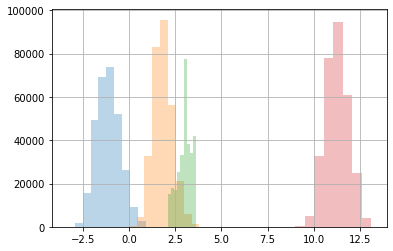

In [235]:
for col in ['INCOME_TO_CREDIT_RATIO', 'INCOME_TO_ANNUITY_RATIO', 'CREDIT_TO_ANNUITY_RATIO', 'INCOME_TO_FAM_SIZE_RATIO']:
    app_train[col] = np.log(app_train[col]+0.01)
    app_train[col].hist(alpha=.3)

##### Fifth group of variables

In [236]:
for i,c in enumerate(app_train.columns):
    print(i, c)

0 TARGET
1 REG_REGION_NOT_LIVE_REGION
2 REG_REGION_NOT_WORK_REGION
3 LIVE_REGION_NOT_WORK_REGION
4 REG_CITY_NOT_LIVE_CITY
5 REG_CITY_NOT_WORK_CITY
6 LIVE_CITY_NOT_WORK_CITY
7 FONDKAPREMONT_MODE
8 HOUSETYPE_MODE
9 WALLSMATERIAL_MODE
10 EMERGENCYSTATE_MODE
11 FLAG_DOCUMENT_2
12 FLAG_DOCUMENT_3
13 FLAG_DOCUMENT_4
14 FLAG_DOCUMENT_5
15 FLAG_DOCUMENT_6
16 FLAG_DOCUMENT_7
17 FLAG_DOCUMENT_8
18 FLAG_DOCUMENT_9
19 FLAG_DOCUMENT_10
20 FLAG_DOCUMENT_11
21 FLAG_DOCUMENT_12
22 FLAG_DOCUMENT_13
23 FLAG_DOCUMENT_14
24 FLAG_DOCUMENT_15
25 FLAG_DOCUMENT_16
26 FLAG_DOCUMENT_17
27 FLAG_DOCUMENT_18
28 FLAG_DOCUMENT_19
29 FLAG_DOCUMENT_20
30 FLAG_DOCUMENT_21
31 ANOMALIES_EMP
32 AMT_INCOME_TOTAL
33 AMT_CREDIT
34 AMT_ANNUITY
35 AMT_GOODS_PRICE
36 REGION_POPULATION_RELATIVE
37 BIRTH_Y
38 EMPLOYED_Y
39 RGISTRATION_Y
40 ID_Y
41 OWN_CAR_AGE
42 EXT_SOURCE_1
43 EXT_SOURCE_2
44 EXT_SOURCE_3
45 APARTMENTS_AVG
46 BASEMENTAREA_AVG
47 YEARS_BEGINEXPLUATATION_AVG
48 YEARS_BUILD_AVG
49 COMMONAREA_AVG
50 ELEVATORS_AVG
51

In [237]:
app_train.columns[45:88]

Index(['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'TOTALAREA_MODE'],
      dtype='ob

In [238]:
app_train.iloc[:,45:88].head()

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,...,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,...,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.000,0.0149
100003,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,...,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.010,0.0714
100004,0.0866,0.0761,0.9816,0.7552,0.0209,0.00,0.1379,0.1667,0.2083,0.0481,...,0.00,0.1379,0.1667,0.2083,0.0486,0.0761,0.0744,0.0000,0.003,0.0685
100006,0.0866,0.0761,0.9816,0.7552,0.0209,0.00,0.1379,0.1667,0.2083,0.0481,...,0.00,0.1379,0.1667,0.2083,0.0486,0.0761,0.0744,0.0000,0.003,0.0685
100007,0.0866,0.0761,0.9816,0.7552,0.0209,0.00,0.1379,0.1667,0.2083,0.0481,...,0.00,0.1379,0.1667,0.2083,0.0486,0.0761,0.0744,0.0000,0.003,0.0685


##### Few of them are discrete 

In [239]:
for col in ['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
            'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']:
    print(app_train[col].value_counts())

reg oper account         71856
reg oper spec account    11797
not specified             5536
org spec account          5428
Name: FONDKAPREMONT_MODE, dtype: int64
block of flats      146588
specific housing      1474
terraced house        1188
Name: HOUSETYPE_MODE, dtype: int64
Panel           64274
Stone, brick    63205
Block            8984
Wooden           5283
Mixed            2238
Monolithic       1675
Others           1579
Name: WALLSMATERIAL_MODE, dtype: int64
No     155327
Yes      2290
Name: EMERGENCYSTATE_MODE, dtype: int64


In [240]:
app_train['FONDKAPREMONT_MODE'] = app_train['FONDKAPREMONT_MODE'].apply(lambda x: int(1) if x == 'reg oper account' else int(0))
app_train['FONDKAPREMONT_MODE'].value_counts()

0    229016
1     71856
Name: FONDKAPREMONT_MODE, dtype: int64

In [241]:
app_train['HOUSETYPE_MODE'] = app_train['HOUSETYPE_MODE'].apply(lambda x: int(1) if x == 'block of flats' else int(0))
app_train['HOUSETYPE_MODE'].value_counts()

0    154284
1    146588
Name: HOUSETYPE_MODE, dtype: int64

In [242]:
dum = pd.get_dummies(app_train.WALLSMATERIAL_MODE)
dum.drop(dum.columns[[0,1,2,3,6]], axis=1, inplace=True)

app_train = pd.concat([app_train, dum], axis=1)
app_train.drop(['WALLSMATERIAL_MODE'], inplace=True, axis=1)
app_train.head(5)

,TARGET,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FONDKAPREMONT_MODE,HOUSETYPE_MODE,EMERGENCYSTATE_MODE,...,OBS_30_3_4,DEF_30_1,DEF_30_2,OBS_60_1,OBS_60_2,OBS_60_3_4,DEF_60_1,DEF_60_2,Panel,"Stone, brick"
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,0,0,0,0,0,1,1,No,...,0,0,1,0,1,0,0,1,0,1
100003,0,0,0,0,0,0,0,1,1,No,...,0,0,0,1,0,0,0,0,0,0
100004,0,0,0,0,0,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
100006,0,0,0,0,0,0,0,0,0,NaN,...,0,0,0,0,1,0,0,0,0,0
100007,0,0,0,0,0,1,1,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [243]:
app_train['EMERGENCYSTATE_MODE'] = app_train['EMERGENCYSTATE_MODE'].apply(lambda x: int(1) if x == 'Yes' else int(0))
app_train['EMERGENCYSTATE_MODE'].value_counts()

0    298582
1      2290
Name: EMERGENCYSTATE_MODE, dtype: int64

##### Others are continuous

In [244]:
for i,c in enumerate(app_train.columns):
    print(i, c)

0 TARGET
1 REG_REGION_NOT_LIVE_REGION
2 REG_REGION_NOT_WORK_REGION
3 LIVE_REGION_NOT_WORK_REGION
4 REG_CITY_NOT_LIVE_CITY
5 REG_CITY_NOT_WORK_CITY
6 LIVE_CITY_NOT_WORK_CITY
7 FONDKAPREMONT_MODE
8 HOUSETYPE_MODE
9 EMERGENCYSTATE_MODE
10 FLAG_DOCUMENT_2
11 FLAG_DOCUMENT_3
12 FLAG_DOCUMENT_4
13 FLAG_DOCUMENT_5
14 FLAG_DOCUMENT_6
15 FLAG_DOCUMENT_7
16 FLAG_DOCUMENT_8
17 FLAG_DOCUMENT_9
18 FLAG_DOCUMENT_10
19 FLAG_DOCUMENT_11
20 FLAG_DOCUMENT_12
21 FLAG_DOCUMENT_13
22 FLAG_DOCUMENT_14
23 FLAG_DOCUMENT_15
24 FLAG_DOCUMENT_16
25 FLAG_DOCUMENT_17
26 FLAG_DOCUMENT_18
27 FLAG_DOCUMENT_19
28 FLAG_DOCUMENT_20
29 FLAG_DOCUMENT_21
30 ANOMALIES_EMP
31 AMT_INCOME_TOTAL
32 AMT_CREDIT
33 AMT_ANNUITY
34 AMT_GOODS_PRICE
35 REGION_POPULATION_RELATIVE
36 BIRTH_Y
37 EMPLOYED_Y
38 RGISTRATION_Y
39 ID_Y
40 OWN_CAR_AGE
41 EXT_SOURCE_1
42 EXT_SOURCE_2
43 EXT_SOURCE_3
44 APARTMENTS_AVG
45 BASEMENTAREA_AVG
46 YEARS_BEGINEXPLUATATION_AVG
47 YEARS_BUILD_AVG
48 COMMONAREA_AVG
49 ELEVATORS_AVG
50 ENTRANCES_AVG
51 FLOO

In [245]:
lst = list(app_train.columns[44:87])
lst

['APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE']

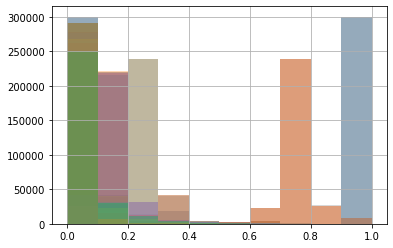

In [246]:
for col in lst:
    app_train[col].hist(alpha=.3)

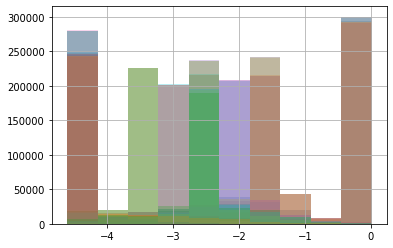

In [247]:
for col in lst:
    app_train[col] = np.log(app_train[col]+0.01)
    app_train[col].hist(alpha=.3)

In [248]:
 app_train.iloc[:,44:87].head()

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,...,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,-3.361016,-3.059738,-0.017960,-0.463306,-3.717279,-4.605170,-2.538307,-2.371935,-2.002481,-3.059738,...,-4.605170,-2.538307,-2.371935,-2.002481,-3.047026,-3.490029,-3.530168,-4.605170,-4.605170,-3.692887
100003,-2.245260,-2.766209,-0.004912,-0.215672,-2.652143,-2.407946,-3.112266,-1.198322,-1.069151,-3.772261,...,-2.407946,-3.112266,-1.198322,-1.069151,-3.763603,-2.422495,-2.721135,-4.275866,-3.912023,-2.508380
100004,-2.337177,-2.452246,-0.008435,-0.267618,-3.476999,-4.605170,-1.911219,-1.733302,-1.521885,-2.845590,...,-4.605170,-1.911219,-1.733302,-1.521885,-2.837021,-2.452246,-2.472188,-4.605170,-4.342806,-2.544657
100006,-2.337177,-2.452246,-0.008435,-0.267618,-3.476999,-4.605170,-1.911219,-1.733302,-1.521885,-2.845590,...,-4.605170,-1.911219,-1.733302,-1.521885,-2.837021,-2.452246,-2.472188,-4.605170,-4.342806,-2.544657
100007,-2.337177,-2.452246,-0.008435,-0.267618,-3.476999,-4.605170,-1.911219,-1.733302,-1.521885,-2.845590,...,-4.605170,-1.911219,-1.733302,-1.521885,-2.837021,-2.452246,-2.472188,-4.605170,-4.342806,-2.544657


#### B) 2. Summing up and chcking missing

In [249]:
# checking missing data
missing = app_train.loc[:, app_train.isnull().any()]
total = missing.isnull().sum().sort_values(ascending = False)
percent = (missing.isnull().sum()/missing.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

print(missing_application_train_data.count())

# Head of table (20)
missing_application_train_data

# nad 10% ísť cestou ANO/NIE, enquiry v credit bureau 0/1 druhy stlpec

Total      0
Percent    0
dtype: int64


,Total,Percent


In [253]:
len(app_train.columns)

265

### C) Predicting variables

Six continuous variable with the biggest impact on target were not processed by simple imputer rather predicted from other attributes, in order to keep their predictive power.

- OWN_CAR_AGE 202929 65.990810
- EXT_SOURCE_1 173378 56.381073
- FLOORSMAX_AVG 153020 49.760822
- EXT_SOURCE_3 60965 19.825307
- DAYS_EMPLOYED 18.00
- DAYS_EMPLOYED_PERCENT 18.00

In [261]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [262]:
print(len(app_train))

300872


#####  EXT_SOURCE_3

In [263]:
X_train = app_train.loc[index_ext_3,:]
y_train = pd.DataFrame(X_train.EXT_SOURCE_3.copy())
X_train.drop(['TARGET', 'EXT_SOURCE_3'], axis=1, inplace=True)

X_pred = app_train.loc[index_ext_3_nan,:]
y_pred = pd.DataFrame(X_pred.EXT_SOURCE_3.copy())
X_pred.drop(['TARGET', 'EXT_SOURCE_3'], axis=1, inplace=True)

lm = LinearRegression()
lm.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ext_3_pred = lm.predict(X_pred)
lin_mse= mean_squared_error(y_pred, ext_3_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.4257346

In [264]:
ext_3_pred

array([[0.48079604],
       [0.4975478 ],
       [0.5770024 ],
       ...,
       [0.43599743],
       [0.3940581 ],
       [0.43848276]], dtype=float32)

In [265]:
app_train.loc[index_ext_3_nan, ['EXT_SOURCE_3']] = ext_3_pred
app_train.loc[index_ext_3_nan, ['EXT_SOURCE_3']].head()

,EXT_SOURCE_3
SK_ID_CURR,
100003,0.480796
100006,0.497548
100007,0.577002
100012,0.489383
100018,0.433056


In [266]:
ind_1 = app_train[app_train.EXT_SOURCE_3 > 1]['EXT_SOURCE_3'].index
ind_0 = app_train[app_train.EXT_SOURCE_3 < 0]['EXT_SOURCE_3'].index

print(len(ind_1), len(ind_0))

0 12


In [267]:
app_train.loc[ind_1, ['EXT_SOURCE_3']] = 1
app_train.loc[ind_0, ['EXT_SOURCE_3']] = 0

##### EXT_SOURCE_1

In [268]:
X_train = app_train.loc[index_ext_1,:]
y_train = pd.DataFrame(X_train.EXT_SOURCE_1.copy())
X_train.drop(['TARGET', 'EXT_SOURCE_1'], axis=1, inplace=True)

X_pred = app_train.loc[index_ext_1_nan,:]
y_pred = pd.DataFrame(X_pred.EXT_SOURCE_1.copy())
X_pred.drop(['TARGET', 'EXT_SOURCE_1'], axis=1, inplace=True)

lm = LinearRegression()
lm.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ext_1_pred = lm.predict(X_pred)
lin_mse= mean_squared_error(y_pred, ext_1_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.23729141

In [269]:
ext_1_pred

array([[0.5288935 ],
       [0.6426213 ],
       [0.6129494 ],
       ...,
       [0.7795932 ],
       [0.63533616],
       [0.42575717]], dtype=float32)

In [270]:
app_train.loc[index_ext_1_nan, ['EXT_SOURCE_1']] = ext_1_pred
app_train.loc[index_ext_1_nan, ['EXT_SOURCE_1']].head()

,EXT_SOURCE_1
SK_ID_CURR,
100004,0.528893
100006,0.642621
100007,0.612949
100008,0.469835
100010,0.624583


In [271]:
ind_1 = app_train[app_train.EXT_SOURCE_1 > 1]['EXT_SOURCE_1'].index
ind_0 = app_train[app_train.EXT_SOURCE_1 < 0]['EXT_SOURCE_1'].index

print(len(ind_1), len(ind_0))

8 0


In [272]:
app_train.loc[ind_1, ['EXT_SOURCE_1']] = 1
app_train.loc[ind_0, ['EXT_SOURCE_1']] = 0

##### OWN_CAR_AGE

In [273]:
ind_med = app_train[app_train.OWN_CAR_AGE == np.median(app_train.OWN_CAR_AGE)].index

In [274]:
app_train.astype('float32')

X_train = app_train.loc[index_car,:]
y_train = pd.DataFrame(X_train.OWN_CAR_AGE.copy())
X_train.drop(['TARGET', 'OWN_CAR_AGE'], axis=1, inplace=True)

X_pred = app_train.loc[ind_med,:]
y_pred = pd.DataFrame(X_pred.OWN_CAR_AGE.copy())
X_pred.drop(['TARGET', 'OWN_CAR_AGE'], axis=1, inplace=True)

X_train.dropna(axis=0, inplace=True)
y_train.dropna(axis=0, inplace=True)
X_pred.dropna(axis=0, inplace=True)
y_pred.dropna(axis=0, inplace=True)

lm = LinearRegression()
lm.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

car_pred = lm.predict(X_pred)
lin_mse= mean_squared_error(y_pred, car_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.6014361

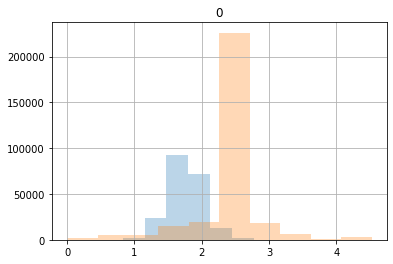

In [275]:
pd.DataFrame(car_pred).hist(alpha=0.3)
app_train.OWN_CAR_AGE.hist(alpha=0.3)

In [276]:
len(app_train)

300872

In [277]:
ind_med

Int64Index([100002, 100003, 100006, 100007, 100008, 100011, 100012, 100014,
            100015, 100016,
            ...
            456245, 456246, 456247, 456248, 456249, 456251, 456252, 456253,
            456254, 456255],
           dtype='int64', name='SK_ID_CURR', length=204055)

In [278]:
app_train.loc[ind_med, ['OWN_CAR_AGE']] = car_pred
app_train.loc[ind_med, ['OWN_CAR_AGE']].head()

,OWN_CAR_AGE
SK_ID_CURR,
100002,1.816253
100003,1.609689
100006,1.849380
100007,1.582885
100008,1.764750


In [279]:
len(app_train)

300872

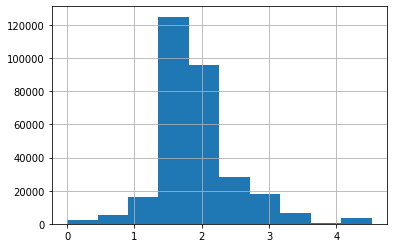

In [280]:
app_train.OWN_CAR_AGE.hist()

### D) Lending History

In this section, we are joining data from other datasets provided by Home Credit.

##### Overview of datasets:


* application_{train|test}.csv

    * This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
    * Static data for all applications. One row represents one loan in our data sample.

* bureau.csv

    * All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
    * For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

* bureau_balance.csv

    * Monthly balances of previous credits in Credit Bureau.
    * This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

* POS_CASH_balance.csv

    * Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
    * This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

* credit_card_balance.csv

    * Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
    * This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

* previous_application.csv

    * All previous applications for Home Credit loans of clients who have loans in our sample.
    * There is one row for each previous application related to loans in our data sample.

* installments_payments.csv

    * Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
    * There is a) one row for every payment that was made plus b) one row each for missed payment.
    * One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

#### D) 1. Data From: previous_application.csv

In [281]:
previous = pd.read_csv('previous_application.csv')

In [282]:
len(previous)

1670214

In [283]:
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
previous.set_index('SK_ID_CURR', inplace=True)
previous.NAME_CONTRACT_STATUS = previous.NAME_CONTRACT_STATUS.apply(lambda x: 'Unused_offer' if x =='Unused offer' else x)
previous.head()

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
271877,2030495,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
108129,2802425,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
122040,2523466,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
176158,2819243,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
202054,1784265,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [285]:
previous.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused_offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [286]:
dum = pd.get_dummies(previous.NAME_CONTRACT_STATUS, prefix='PREVIOUS')

previous = pd.concat([previous, dum], axis=1)
previous.head(5)

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,PREVIOUS_Approved,PREVIOUS_Canceled,PREVIOUS_Refused,PREVIOUS_Unused_offer
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
271877,2030495,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,...,365243.0,-42.0,300.0,-42.0,-37.0,0.0,1,0,0,0
108129,2802425,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,...,365243.0,-134.0,916.0,365243.0,365243.0,1.0,1,0,0,0
122040,2523466,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,...,365243.0,-271.0,59.0,365243.0,365243.0,1.0,1,0,0,0
176158,2819243,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,...,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,1,0,0,0
202054,1784265,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0


In [287]:
prev_grouped = previous.groupby(['SK_ID_CURR']).sum()[['PREVIOUS_Approved','PREVIOUS_Canceled','PREVIOUS_Refused','PREVIOUS_Unused_offer']]
prev_grouped.head()

,PREVIOUS_Approved,PREVIOUS_Canceled,PREVIOUS_Refused,PREVIOUS_Unused_offer
SK_ID_CURR,,,,
100001,1,0,0,0
100002,1,0,0,0
100003,3,0,0,0
100004,1,0,0,0
100005,1,1,0,0


In [288]:
prev_grouped['IN_CONTACT'] = prev_grouped.sum(axis=1)
prev_grouped.head()

,PREVIOUS_Approved,PREVIOUS_Canceled,PREVIOUS_Refused,PREVIOUS_Unused_offer,IN_CONTACT
SK_ID_CURR,,,,,
100001,1,0,0,0,1
100002,1,0,0,0,1
100003,3,0,0,0,3
100004,1,0,0,0,1
100005,1,1,0,0,2


In [289]:
len(prev_grouped.index.unique())

338857

In [290]:
len(app_train)

300872

In [291]:
app_train = pd.merge(app_train, prev_grouped, how='left', left_index=True, right_index=True)
app_train.head()

# previous APROVED/CANCLED/REFUSE/UNUSED

,TARGET,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FONDKAPREMONT_MODE,HOUSETYPE_MODE,EMERGENCYSTATE_MODE,...,OBS_60_3_4,DEF_60_1,DEF_60_2,Panel,"Stone, brick",PREVIOUS_Approved,PREVIOUS_Canceled,PREVIOUS_Refused,PREVIOUS_Unused_offer,IN_CONTACT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
100003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0
100004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
100006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,3.0,1.0,0.0,9.0
100007,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,6.0


In [292]:
len(app_train)

300872

In [293]:
print(app_train.IN_CONTACT.notnull().sum(), app_train.IN_CONTACT.isnull().sum())

# if there was any previous debt in regard to currect loan

286053 14819


In [294]:
app_train['IN_CONTACT'] = app_train.IN_CONTACT.apply(lambda x: int(1) if pd.notna(x) else int(0))    
app_train['IN_CONTACT'].value_counts()

1    286053
0     14819
Name: IN_CONTACT, dtype: int64

In [295]:
for col in ['PREVIOUS_Approved', 'PREVIOUS_Canceled', 'PREVIOUS_Refused', 'PREVIOUS_Unused_offer']:
    print(app_train[col].value_counts())

1.0     75143
2.0     66269
3.0     51386
4.0     35129
5.0     22791
6.0     14051
7.0      8487
8.0      4896
9.0      2886
10.0     1725
0.0       957
11.0      944
12.0      580
13.0      333
14.0      202
15.0       99
16.0       60
18.0       37
17.0       37
19.0       20
20.0        9
21.0        5
23.0        2
22.0        2
24.0        2
27.0        1
Name: PREVIOUS_Approved, dtype: int64
0.0     177137
1.0      49187
2.0      25690
3.0      14147
4.0       8037
5.0       4690
6.0       2699
7.0       1629
8.0        955
9.0        618
10.0       432
11.0       239
12.0       183
13.0       121
14.0        94
15.0        61
16.0        29
17.0        26
18.0        15
19.0        13
20.0        11
21.0         9
24.0         5
25.0         4
22.0         4
23.0         4
28.0         2
26.0         2
30.0         1
31.0         1
38.0         1
52.0         1
27.0         1
57.0         1
40.0         1
34.0         1
58.0         1
44.0         1
Name: PREVIOUS_Canceled, dty

#####  cancelled

In [296]:
app_train['PREV_Can_2+'] = app_train.PREVIOUS_Canceled.apply(lambda x: 1 if x > 1.0 else 0)
app_train['PREV_Can_1'] = app_train.PREVIOUS_Canceled.apply(lambda x: 1 if x == 1.0 else 0)
app_train.drop(['PREVIOUS_Canceled'], axis=1, inplace=True)
app_train.head()

,TARGET,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FONDKAPREMONT_MODE,HOUSETYPE_MODE,EMERGENCYSTATE_MODE,...,DEF_60_1,DEF_60_2,Panel,"Stone, brick",PREVIOUS_Approved,PREVIOUS_Refused,PREVIOUS_Unused_offer,IN_CONTACT,PREV_Can_2+,PREV_Can_1
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1,0,0
100003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1,0,0
100004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0
100006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,1.0,0.0,1,1,0
100007,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1,0,0


##### unused 

In [297]:
app_train['PREV_Unused'] = app_train['PREVIOUS_Unused_offer'].apply(lambda x: 0 if x == 0.0 else 1)
app_train.drop(['PREVIOUS_Unused_offer'], axis=1, inplace=True)
app_train['PREV_Unused'].value_counts()

0    267313
1     33559
Name: PREV_Unused, dtype: int64

##### approved

In [298]:
dum = pd.get_dummies(app_train.PREVIOUS_Approved, prefix='PREV_Appro')
dum['PREV_Appro_3-4'] = dum.iloc[:,3:5].sum(axis=1)
dum['PREV_Appro_5>'] = dum.iloc[:,5:-1].sum(axis=1)
dum.drop(dum.columns[3:-2], axis=1, inplace=True)
dum.drop(['PREV_Appro_0.0'], axis=1, inplace=True)

app_train = pd.concat([app_train, dum], axis=1)
app_train.drop(['PREVIOUS_Approved'], inplace=True, axis=1)
app_train.head(5)

,TARGET,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FONDKAPREMONT_MODE,HOUSETYPE_MODE,EMERGENCYSTATE_MODE,...,"Stone, brick",PREVIOUS_Refused,IN_CONTACT,PREV_Can_2+,PREV_Can_1,PREV_Unused,PREV_Appro_1.0,PREV_Appro_2.0,PREV_Appro_3-4,PREV_Appro_5>
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1,0,0,0,1,0,0,0
100003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1,0,0,0,0,0,1,0
100004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,0,0,0,1,0,0,0
100006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1,1,0,0,0,0,0,1
100007,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1,0,0,0,0,0,0,1


##### refused

In [299]:
dum = pd.get_dummies(app_train.PREVIOUS_Refused, prefix='PREV_Ref')
dum['PREV_Ref2>'] = dum.iloc[:,2:].sum(axis=1)
dum.drop(dum.columns[2:-1], axis=1, inplace=True)
dum.drop(['PREV_Ref_0.0'], axis=1, inplace=True)

app_train = pd.concat([app_train, dum], axis=1)
app_train.drop(['PREVIOUS_Refused'], axis=1, inplace=True)
app_train.head(5)

,TARGET,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FONDKAPREMONT_MODE,HOUSETYPE_MODE,EMERGENCYSTATE_MODE,...,IN_CONTACT,PREV_Can_2+,PREV_Can_1,PREV_Unused,PREV_Appro_1.0,PREV_Appro_2.0,PREV_Appro_3-4,PREV_Appro_5>,PREV_Ref_1.0,PREV_Ref2>
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,0,0,0,1,0,0,0,0,0
100003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,0,0,0,0,0,1,0,0,0
100004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,0
100006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,1,1,0
100007,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0


In [300]:
app_train.isnull().any().value_counts()

False    274
dtype: int64

In [301]:
len(app_train)

300872

#### D) 2. Data From: POS_CASH_balance.csv

In [302]:
pos_cash = pd.read_csv('POS_CASH_balance.csv')

In [303]:
len(pos_cash)

10001358

In [304]:
pos_cash.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [305]:
pos_cash.loc[pos_cash['SK_DPD_DEF'] > 0.0, 'Default_POS'] = 1
pos_cash.loc[pos_cash['SK_DPD_DEF'] == 0.0, 'Default_POS'] = 0
pos_cash.Default_POS.value_counts()

0.0    9887389
1.0     113969
Name: Default_POS, dtype: int64

#### D) 3. Data From: credit_card_balance.csv

In [306]:
card = pd.read_csv('credit_card_balance.csv')

In [307]:
len(card)

3840312

In [308]:
card.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [309]:
card['Default_CARD'] = card.SK_DPD_DEF.apply(lambda x: 1 if x > 0.0 else 0)

card.Default_CARD.value_counts()

0    3750972
1      89340
Name: Default_CARD, dtype: int64

In [310]:
pos_default = pos_cash[['SK_ID_CURR','Default_POS']].groupby(['SK_ID_CURR']).sum()
cash_default = card[['SK_ID_CURR','Default_CARD']].groupby(['SK_ID_CURR']).sum()

default_table = pd.concat([cash_default, pos_default], axis=1)
default_table['DEFAULT_PREVIOUSLY'] = default_table.sum(axis=1)
default_table.head()

,Default_CARD,Default_POS,DEFAULT_PREVIOUSLY
SK_ID_CURR,,,
100001,NaN,1.0,1.0
100002,NaN,0.0,0.0
100003,NaN,0.0,0.0
100004,NaN,0.0,0.0
100005,NaN,0.0,0.0


In [311]:
default_table['DEF_POS_1'] = default_table.Default_POS.apply(lambda x: 1 if x==1.0 else 0)
default_table['DEF_POS_2'] = default_table.Default_POS.apply(lambda x: 1 if x>1.0 else 0)

default_table['DEF_CARD_1'] = default_table.Default_CARD.apply(lambda x: 1 if x==1.0 else 0)
default_table['DEF_CARD_2'] = default_table.Default_CARD.apply(lambda x: 1 if x>1.0 else 0)

default_table['DEF_PREV'] = default_table.DEFAULT_PREVIOUSLY.apply(lambda x: 1 if x!=0 else 0)

default_table.drop(['Default_POS', 'Default_CARD', 'DEFAULT_PREVIOUSLY'], axis=1, inplace=True)
default_table.head()

,DEF_POS_1,DEF_POS_2,DEF_CARD_1,DEF_CARD_2,DEF_PREV
SK_ID_CURR,,,,,
100001,1,0,0,0,1
100002,0,0,0,0,0
100003,0,0,0,0,0
100004,0,0,0,0,0
100005,0,0,0,0,0


In [312]:
app_train = pd.merge(app_train, default_table, how='left', left_index=True, right_index=True)
app_train.head()

,TARGET,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FONDKAPREMONT_MODE,HOUSETYPE_MODE,EMERGENCYSTATE_MODE,...,PREV_Appro_2.0,PREV_Appro_3-4,PREV_Appro_5>,PREV_Ref_1.0,PREV_Ref2>,DEF_POS_1,DEF_POS_2,DEF_CARD_1,DEF_CARD_2,DEF_PREV
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
100003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0
100004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
100006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0
100007,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0


In [313]:
app_train[['DEF_POS_1','DEF_POS_2', 'DEF_CARD_1','DEF_CARD_2', 'DEF_PREV']] = app_train[['DEF_POS_1','DEF_POS_2', 'DEF_CARD_1','DEF_CARD_2', 'DEF_PREV']].fillna(0)

In [314]:
app_train.isnull().any().value_counts()

False    279
dtype: int64

In [315]:
len(app_train)

300872

#### D) 4. Data from: Instalments_payments.csv

In [316]:
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [317]:
ins = pd.read_csv('installments_payments.csv', nrows = None)
ins, cat_cols = one_hot_encoder(ins, nan_as_category= True)

# Percentage and difference paid in each installment (amount paid and installment value)
ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']

# Days past due and days before due (no negative values)
ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
# Features: Perform aggregations
aggregations = {
    'NUM_INSTALMENT_VERSION': ['nunique'],
    'DPD': ['max', 'mean', 'sum'],
    'DBD': ['max', 'mean', 'sum'],
    'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
    'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
    'AMT_INSTALMENT': ['max', 'mean', 'sum'],
    'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
    'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
}
for cat in cat_cols:
    aggregations[cat] = ['mean']
ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
# Count installments accounts
ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()


In [318]:
len(ins_agg)

339587

In [319]:
target_merge = app_train['TARGET'].copy()
ins_target = ins_agg.merge(target_merge, left_index=True, right_index=True, how='inner')

In [320]:
ins_target.head()

,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,INSTAL_DPD_MAX,INSTAL_DPD_MEAN,INSTAL_DPD_SUM,INSTAL_DBD_MAX,INSTAL_DBD_MEAN,INSTAL_DBD_SUM,INSTAL_PAYMENT_PERC_MAX,INSTAL_PAYMENT_PERC_MEAN,INSTAL_PAYMENT_PERC_SUM,...,INSTAL_AMT_INSTALMENT_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,INSTAL_COUNT,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,2,0.0,0.000000,0.0,31.0,20.421053,388.0,1.0,1.000000,19.0,...,219625.695,9251.775,53093.745,11559.247105,219625.695,-49.0,-315.421053,-5993.0,19,1.0
100003,2,0.0,0.000000,0.0,14.0,7.160000,179.0,1.0,1.000000,25.0,...,1618864.650,6662.970,560835.360,64754.586000,1618864.650,-544.0,-1385.320000,-34633.0,25,0.0
100004,2,0.0,0.000000,0.0,11.0,7.666667,23.0,1.0,1.000000,3.0,...,21288.465,5357.250,10573.965,7096.155000,21288.465,-727.0,-761.666667,-2285.0,3,0.0
100006,2,0.0,0.000000,0.0,77.0,19.375000,310.0,1.0,1.000000,16.0,...,1007153.415,2482.920,691786.890,62947.088438,1007153.415,-12.0,-271.625000,-4346.0,16,0.0
100007,2,12.0,0.954545,63.0,31.0,4.590909,303.0,1.0,0.954545,63.0,...,835985.340,0.180,22678.785,12214.060227,806127.975,-14.0,-1032.242424,-68128.0,66,0.0


In [321]:
corr_matrix = ins_target.corr()
corr_matrix['TARGET'].sort_values(ascending=False)

TARGET                                   1.000000
INSTAL_DAYS_ENTRY_PAYMENT_MEAN           0.044318
INSTAL_DAYS_ENTRY_PAYMENT_SUM            0.035602
INSTAL_PAYMENT_DIFF_MEAN                 0.029520
INSTAL_PAYMENT_DIFF_SUM                  0.027059
INSTAL_PAYMENT_DIFF_MAX                  0.019393
INSTAL_DPD_MEAN                          0.008863
INSTAL_DPD_SUM                           0.006468
INSTAL_DPD_MAX                           0.003739
INSTAL_AMT_INSTALMENT_MAX                0.003145
INSTAL_AMT_PAYMENT_MAX                   0.002378
INSTAL_PAYMENT_PERC_MEAN                 0.000257
INSTAL_PAYMENT_PERC_MAX                 -0.000218
INSTAL_PAYMENT_PERC_VAR                 -0.000521
INSTAL_PAYMENT_PERC_SUM                 -0.001454
INSTAL_DAYS_ENTRY_PAYMENT_MAX           -0.002230
INSTAL_DBD_MAX                          -0.007088
INSTAL_PAYMENT_DIFF_VAR                 -0.009521
INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE   -0.009932
INSTAL_AMT_INSTALMENT_MEAN              -0.017525


In [322]:
ins_merge = ins_target[['INSTAL_DAYS_ENTRY_PAYMENT_MEAN', 'INSTAL_PAYMENT_DIFF_MEAN', 'INSTAL_DBD_SUM',
                        'INSTAL_AMT_PAYMENT_MIN', 'INSTAL_COUNT']].copy()
app_train = pd.merge(app_train, ins_merge, how='left', left_index=True, right_index=True)
app_train.head()

,TARGET,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FONDKAPREMONT_MODE,HOUSETYPE_MODE,EMERGENCYSTATE_MODE,...,DEF_POS_1,DEF_POS_2,DEF_CARD_1,DEF_CARD_2,DEF_PREV,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_DBD_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_COUNT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-315.421053,0.000000,388.0,9251.775,19.0
100003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1385.320000,0.000000,179.0,6662.970,25.0
100004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-761.666667,0.000000,23.0,5357.250,3.0
100006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-271.625000,0.000000,310.0,2482.920,16.0
100007,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1032.242424,452.384318,303.0,0.180,66.0


##### Continuous data 

In [323]:
lst_inst = ['INSTAL_DAYS_ENTRY_PAYMENT_MEAN', 'INSTAL_PAYMENT_DIFF_MEAN', 'INSTAL_DBD_SUM', 'INSTAL_AMT_PAYMENT_MIN', 'INSTAL_COUNT']

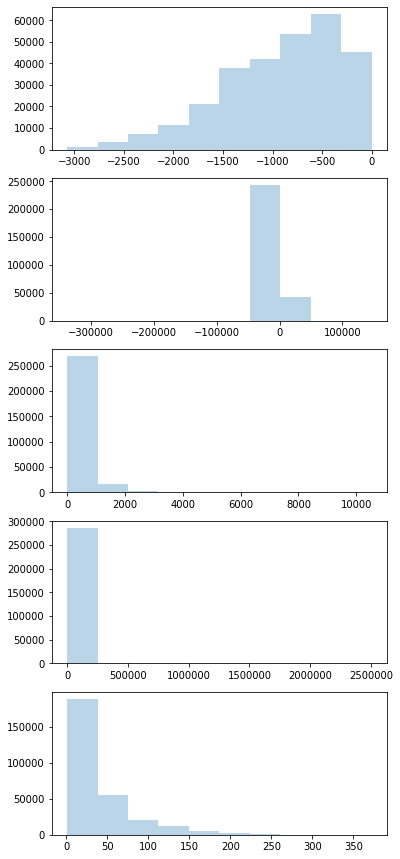

In [324]:
plt.figure()
i = 1
t = 5

for col in lst_inst:
    plt.subplot(t,1,i)
    plt.hist(app_train[col], alpha=.3)
    plt.subplots_adjust(top=3)
    i += 1

In [325]:
app_train.drop(['INSTAL_PAYMENT_DIFF_MEAN'], axis=1, inplace=True)

In [326]:
app_train['TARGET'][app_train['INSTAL_DBD_SUM'] > 4000].count()

169

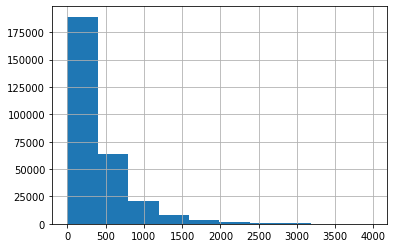

In [327]:
app_train.drop(app_train[app_train['INSTAL_DBD_SUM'] > 4000].index, axis=0)['INSTAL_DBD_SUM'].hist()

In [328]:
app_train.drop(app_train[app_train['INSTAL_DBD_SUM'] > 4000].index, axis=0, inplace=True)

In [329]:
app_train['TARGET'][app_train['INSTAL_AMT_PAYMENT_MIN'] > 100000].count()

270

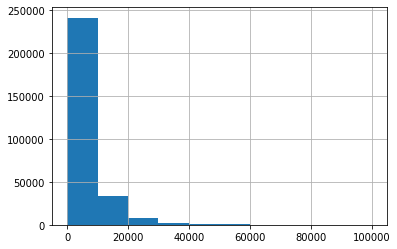

In [330]:
app_train.drop(app_train[app_train['INSTAL_AMT_PAYMENT_MIN'] > 100000].index, axis=0)['INSTAL_AMT_PAYMENT_MIN'].hist()

In [331]:
app_train.drop(app_train[app_train['INSTAL_AMT_PAYMENT_MIN'] > 100000].index, axis=0, inplace=True)

#####  Logarithm

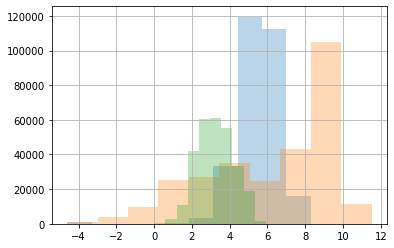

In [332]:
lst_log = ['INSTAL_DBD_SUM', 'INSTAL_AMT_PAYMENT_MIN', 'INSTAL_COUNT']

for col in lst_log:
    app_train[col] = np.log(app_train[col]+0.01)
    app_train[col].hist(alpha=.3)

##### Replcement of missing by mean

In [333]:
# checking missing data
missing = app_train.loc[:, app_train.isnull().any()]
total = missing.isnull().sum().sort_values(ascending = False)
percent = (missing.isnull().sum()/missing.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

print(missing_application_train_data.count())

# Head of table (20)
missing_application_train_data

# nad 10% ísť cestou ANO/NIE, enquiry v credit bureau 0/1 druhy stlpec

Total      4
Percent    4
dtype: int64


,Total,Percent
INSTAL_AMT_PAYMENT_MIN,14209,4.729507
INSTAL_DAYS_ENTRY_PAYMENT_MEAN,14209,4.729507
INSTAL_COUNT,14201,4.726844
INSTAL_DBD_SUM,14201,4.726844


In [334]:
for col in ['INSTAL_DAYS_ENTRY_PAYMENT_MEAN', 'INSTAL_DBD_SUM', 'INSTAL_AMT_PAYMENT_MIN', 'INSTAL_COUNT']:
    mean = np.mean(app_train[col])
    app_train[col] = app_train[col].apply(lambda x: mean if np.isnan(x) else x)

In [335]:
# checking missing data
missing = app_train.loc[:, app_train.isnull().any()]
total = missing.isnull().sum().sort_values(ascending = False)
percent = (missing.isnull().sum()/missing.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

print(missing_application_train_data.count())

# Head of table (20)
missing_application_train_data

# nad 10% ísť cestou ANO/NIE, enquiry v credit bureau 0/1 druhy stlpec

Total      0
Percent    0
dtype: int64


,Total,Percent


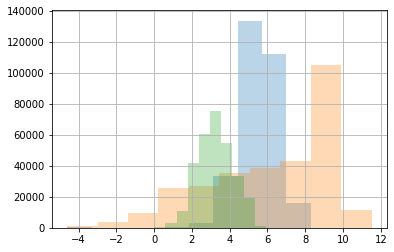

In [336]:
for col in lst_log:
    app_train[col].hist(alpha=.3)

## EXPORT

##### Exploring missing

In [343]:
# checking missing data
missing = app_train.loc[:, app_train.isna().any()]
total = missing.isnull().sum().sort_values(ascending = False)
percent = (missing.isnull().sum()/missing.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

print(missing_application_train_data.count())

# Head of table (20)
missing_application_train_data

# nad 10% ísť cestou ANO/NIE, enquiry v credit bureau 0/1 druhy stlpec

Total      0
Percent    0
dtype: int64


,Total,Percent


##### Joing dummy variables for columns with missing values

In [347]:
new = app_train.merge(YN_train,how='left', left_index=True ,right_index=True)

In [348]:
new

,TARGET,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FONDKAPREMONT_MODE,HOUSETYPE_MODE,EMERGENCYSTATE_MODE,...,Y_TOTALAREA_MODE,Y_EMERGENCYSTATE_MODE,Y_OCCUPATION_TYPE,Y_EXT_SOURCE_3,Y_AMT_REQ_CREDIT_BUREAU_YEAR,Y_AMT_REQ_CREDIT_BUREAU_QRT,Y_AMT_REQ_CREDIT_BUREAU_HOUR,Y_AMT_REQ_CREDIT_BUREAU_DAY,Y_AMT_REQ_CREDIT_BUREAU_WEEK,Y_AMT_REQ_CREDIT_BUREAU_MON
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,1,1,1,1,1,1,1,1,1
100003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,1,1,0,1,1,1,1,1,1
100004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,1,1,1,1,1,1
100006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
100007,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,1,1,0,0,0,0,0,0,0
456252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,1,0,0,0,0,0,0,0,0
456253,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1,1,1,1,1,1,1,1,1,1


##### Export 

In [349]:
export_excel = new.to_csv(r'export_17_03_2020.csv', header=True)